# Laboratorio No.3 Jonathan Corado - 18001211 - econometría 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
dataHP = pd.read_csv("train_HP.csv")
dataHP

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

# Imputación de variables numéricas

In [8]:
cols_rescatables = [col for col in dataHP.columns if(dataHP[col].isnull().mean() <= 0.06)]

## CCA

In [9]:
dataHP_noNan= dataHP[cols_rescatables].dropna()
dataHP_noNan.shape

(1338, 75)

## Imputación de media y mediana

In [92]:
medians = dataHP.isnull().mean()
medians = medians[lambda x: (x > 0.0)]
medians


LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [93]:
media = dataHP[medians.index].mean()
mediana = dataHP[medians.index].median()

for index in media.index:
    dataHP[index] = np.round(dataHP[index].fillna(media[index]))

dataHP

C:\Users\Dev1\AppData\Local\Temp\ipykernel_20184\2990481235.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media = dataHP[medians.index].mean()
C:\Users\Dev1\AppData\Local\Temp\ipykernel_20184\2990481235.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mediana = dataHP[medians.index].median()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

# Imputación de variables categóricas

In [94]:
#extraemos columnas con algún faltante
cols_na = [col for col in dataHP.columns if(dataHP[col].isnull().mean() > 0)]
cols_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [95]:
dataHP[cols_na].dtypes 

Alley           object
MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
FireplaceQu     object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
PoolQC          object
Fence           object
MiscFeature     object
dtype: object

In [96]:
medians = dataHP.isnull().mean()
medians = medians[lambda x: (x > 0.0)]
medians

Alley           0.937671
MasVnrType      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

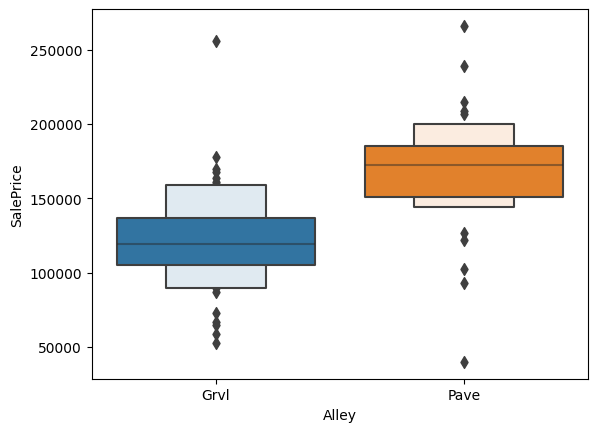

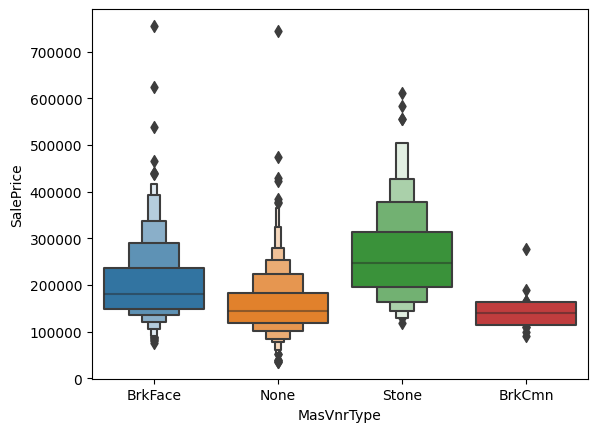

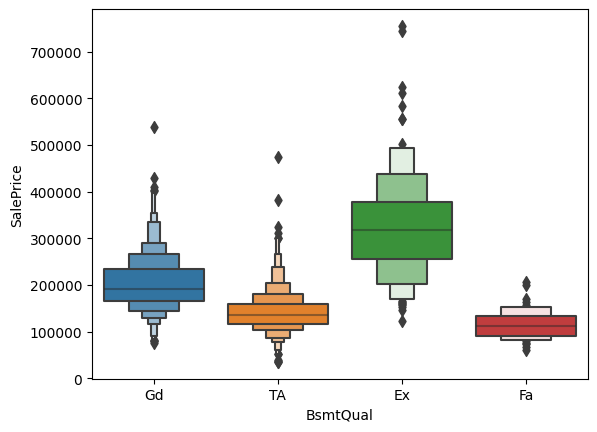

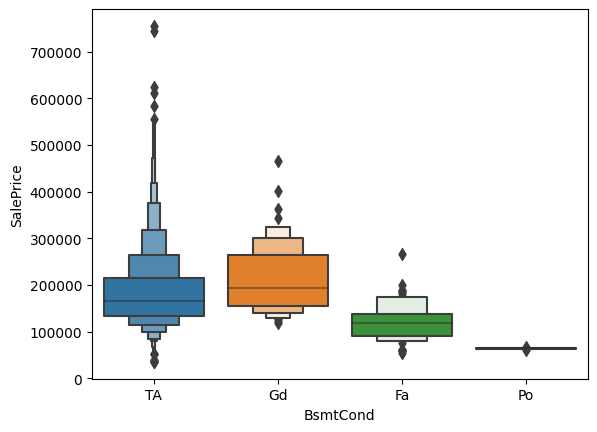

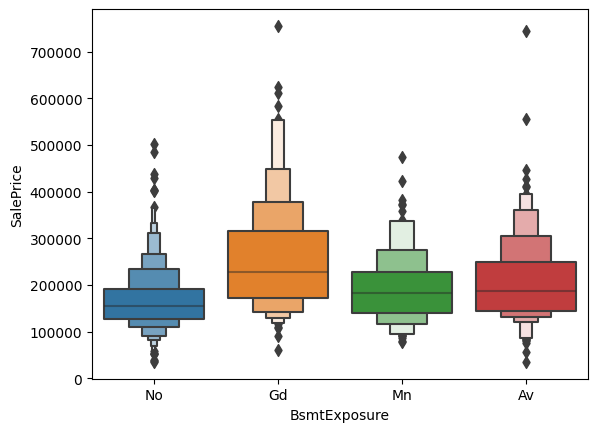

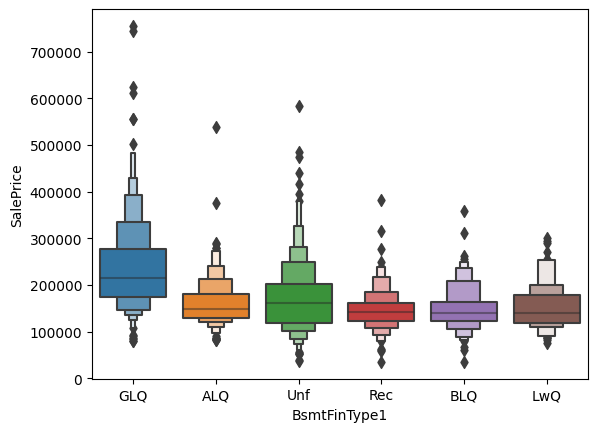

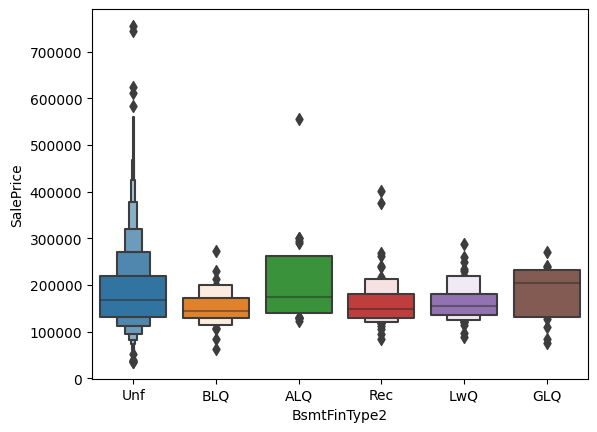

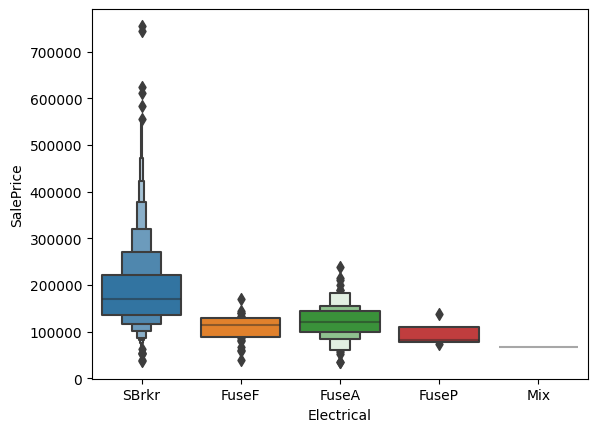

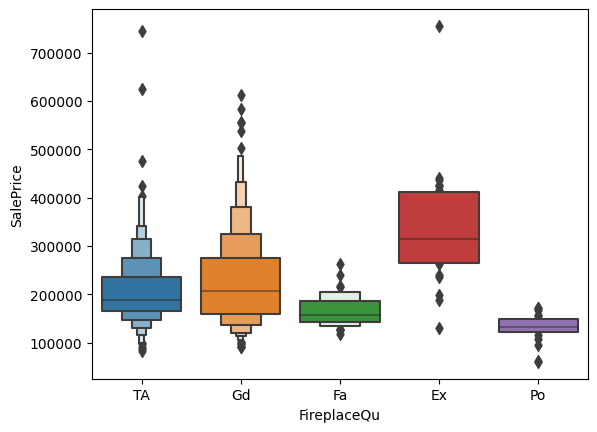

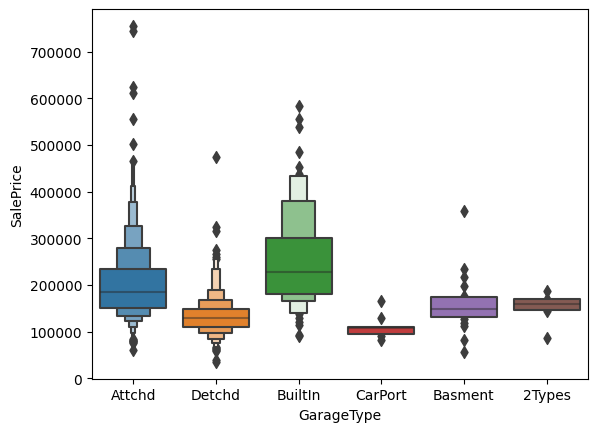

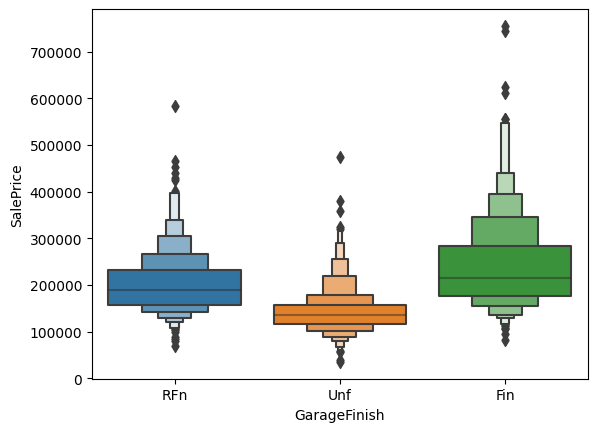

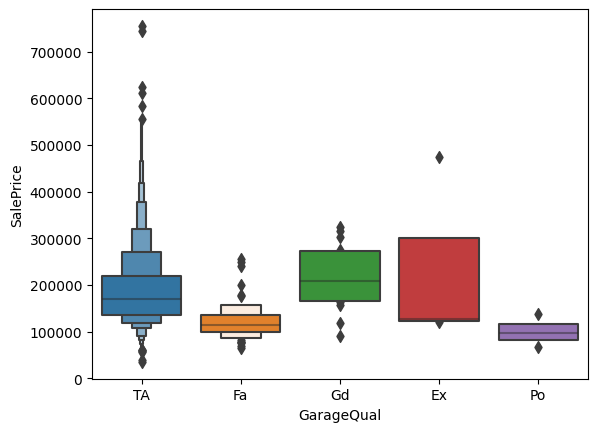

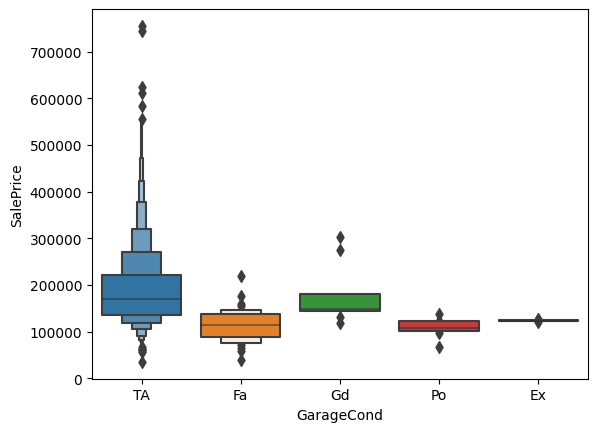

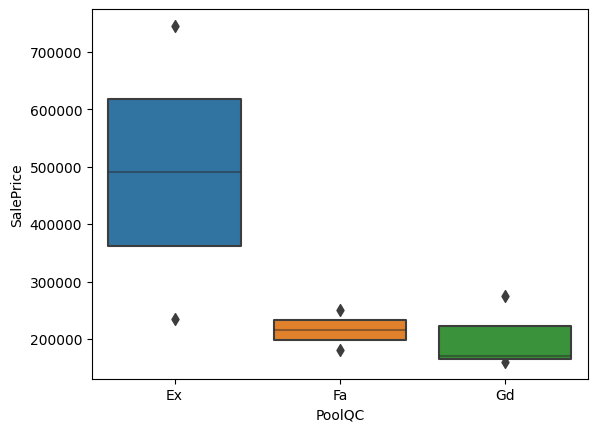

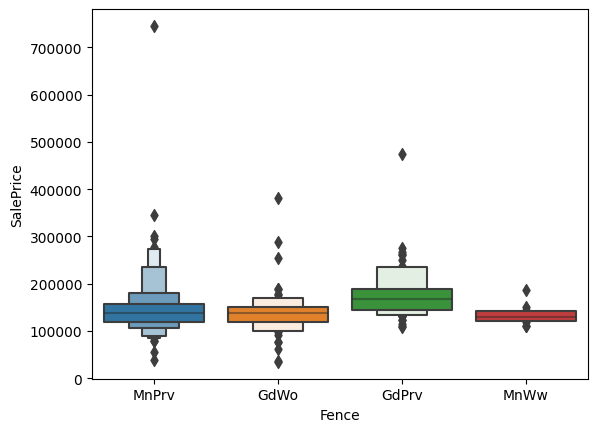

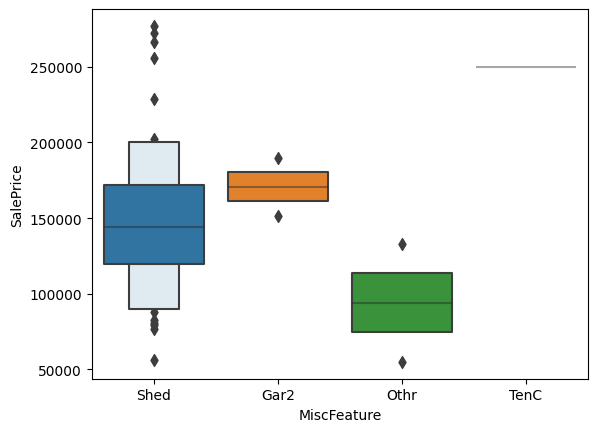

In [104]:
for index in medians.index:
    sns.boxenplot(x=dataHP[index], y=dataHP['SalePrice'])
    plt.show()


In [105]:
dataHP['Alley'].fillna('Grvl', inplace=True) #imputamos valores 
dataHP['MasVnrType'].fillna('BrkCmn', inplace=True) #imputamos valores 
dataHP['BsmtQual'].fillna('Fa', inplace=True) #imputamos valores 
dataHP['BsmtCond'].fillna('Po', inplace=True) #imputamos valores
dataHP['BsmtExposure'].fillna('No', inplace=True) #imputamos valores  
dataHP['BsmtFinType1'].fillna('Rec', inplace=True) #imputamos valores 
dataHP['BsmtFinType2'].fillna('BLQ', inplace=True) #imputamos valores 
dataHP['Electrical'].fillna('Mix', inplace=True) #imputamos valores 
dataHP['FireplaceQu'].fillna('Po', inplace=True) #imputamos valores 
dataHP['GarageType'].fillna('CarPort', inplace=True) #imputamos valores 
dataHP['GarageFinish'].fillna('Unf', inplace=True) #imputamos valores 
dataHP['GarageQual'].fillna('Po', inplace=True) #imputamos valores 
dataHP['GarageCond'].fillna('Ex', inplace=True) #imputamos valores 
dataHP['PoolQC'].fillna('Fa', inplace=True) #imputamos valores 
dataHP['Fence'].fillna('MnWw', inplace=True) #imputamos valores 
dataHP['MiscFeature'].fillna('TenC', inplace=True) #imputamos valores 

In [106]:
dataHP

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave  Grvl      Reg   
1        2          20       RL         80.0     9600   Pave  Grvl      Reg   
2        3          60       RL         68.0    11250   Pave  Grvl      IR1   
3        4          70       RL         60.0     9550   Pave  Grvl      IR1   
4        5          60       RL         84.0    14260   Pave  Grvl      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave  Grvl      Reg   
1456  1457          20       RL         85.0    13175   Pave  Grvl      Reg   
1457  1458          70       RL         66.0     9042   Pave  Grvl      Reg   
1458  1459          20       RL         68.0     9717   Pave  Grvl      Reg   
1459  1460          20       RL         75.0     9937   Pave  Grvl      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0     Fa   MnWw        TenC       0   
1            Lvl    AllPub  ...        0     Fa   MnWw        TenC       0   
2            Lvl    AllPub  ...        0     Fa   MnWw        TenC       0   
3            Lvl    AllPub  ...        0     Fa   MnWw        TenC       0   
4            Lvl    AllPub  ...        0     Fa   MnWw        TenC       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0     Fa   MnWw        TenC       0   
1456         Lvl    AllPub  ...        0     Fa  MnPrv        TenC       0   
1457         Lvl    AllPub  ...        0     Fa  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0     Fa   MnWw        TenC       0   
1459         Lvl    AllPub  ...        0     Fa   MnWw        TenC       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

# Codificación de variables categóricas

## Frequency encoding

In [110]:
for colname in dataHP.columns:
    print(colname, ":", len(dataHP[colname].unique()))

Id : 1460
MSSubClass : 15
MSZoning : 5
LotFrontage : 110
LotArea : 1073
Street : 2
Alley : 2
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
OverallQual : 10
OverallCond : 9
YearBuilt : 112
YearRemodAdd : 61
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 4
MasVnrArea : 327
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinSF1 : 637
BsmtFinType2 : 6
BsmtFinSF2 : 144
BsmtUnfSF : 780
TotalBsmtSF : 721
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 5
1stFlrSF : 753
2ndFlrSF : 417
LowQualFinSF : 24
GrLivArea : 861
BsmtFullBath : 4
BsmtHalfBath : 3
FullBath : 4
HalfBath : 3
BedroomAbvGr : 8
KitchenAbvGr : 4
KitchenQual : 4
TotRmsAbvGrd : 12
Functional : 7
Fireplaces : 4
FireplaceQu : 5
GarageType : 6
GarageYrBlt : 97
GarageFinish : 3
GarageCars : 5
GarageArea : 441
GarageQual : 5
GarageCond : 5
PavedDr

In [108]:
pd.get_dummies(dataHP).head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  SaleType_New  \
0          2003       196.0         706  ...               0             0   
1          1976         0.0         978  ...               0             0   
2          2002       162.0         486  ...               0             0   
3          1970         0.0         216  ...               0             0   
4          2000       350.0         655  ...               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0             0            1                      0                      0   
1             0            1                      0                      0   
2             0            1                      0                      0   
3             0            1                      1                      0   
4             0            1                      0                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 290 columns]

In [115]:
categorical = dataHP.select_dtypes(include=['object']).columns.tolist()

for col in categorical:
    freq = (dataHP[col].value_counts().sort_values(ascending=False)).to_dict()
    dataHP[col] = dataHP[col].map(freq)


dataHP

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60      1151         65.0     8450    1454   1419   
1        2          20      1151         80.0     9600    1454   1419   
2        3          60      1151         68.0    11250    1454   1419   
3        4          70      1151         60.0     9550    1454   1419   
4        5          60      1151         84.0    14260    1454   1419   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456          60      1151         62.0     7917    1454   1419   
1456  1457          20      1151         85.0    13175    1454   1419   
1457  1458          70      1151         66.0     9042    1454   1419   
1458  1459          20      1151         68.0     9717    1454   1419   
1459  1460          20      1151         75.0     9937    1454   1419   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0          925         1311       1459  ...         0    1455   1190   
1          925         1311       1459  ...         0    1455   1190   
2          484         1311       1459  ...         0    1455   1190   
3          484         1311       1459  ...         0    1455   1190   
4          484         1311       1459  ...         0    1455   1190   
...        ...          ...        ...  ...       ...     ...    ...   
1455       925         1311       1459  ...         0    1455   1190   
1456       925         1311       1459  ...         0    1455    157   
1457       925         1311       1459  ...         0    1455     59   
1458       925         1311       1459  ...         0    1455   1190   
1459       925         1311       1459  ...         0    1455   1190   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0            1407        0       2    2008      1267           1198     208500  
1            1407        0       5    2007      1267           1198     181500  
2            1407        0       9    2008      1267           1198     223500  
3            1407        0       2    2006      1267            101     140000  
4            1407        0      12    2008      1267           1198     250000  
...           ...      ...     ...     ...       ...            ...        ...  
1455         1407        0       8    2007      1267           1198     175000  
1456         1407        0       2    2010      1267           1198     210000  
1457           49     2500       5    2010      1267           1198     266500  
1458         1407        0       4    2010      1267           1198     142125  
1459         1407        0       6    2008      1267           1198     147500  

[1460 rows x 81 columns]

# Outliers

In [117]:
def getColumnTypes(dataset):

     ''' Descripcion: Esta función extrae el tipo de dominio de las columnas de un dataset.

         Entradas: Pandas Dataframe  

         Salida: Tupla con arreglo que contine nombres de las columnas. '''

     

     continuas = []

     discretas = []

     categoricas = []

     for col in dataset.columns:

          if((dataset[col].dtype == 'int64') or (dataset[col].dtype == 'float64')):

               if(len(dataset[col].unique()) > 30): #criterio para discretas o continuas

                    continuas.append(col)

               else:

                    discretas.append(col)

          else:

               categoricas.append(col)

 

     return continuas, discretas, categoricas

In [118]:
continuas, discretas, categoricas = getColumnTypes(dataHP)
print(continuas)
print(discretas)
print(categoricas)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolA

In [119]:
import scipy.stats as stats
def plotDistBoxQQ(dataset, col):

     '''

     Descripcion: Muestra las graficas de Distribución, Boxplot y QQ-Plot para detectar Outliers 

     Input: dataset-> pandas dataframe, col->string con nombre de columna

     output: visualiuzación de plots.

     '''

     plt.figure(figsize=(20, 6))

     plt.subplot(1, 3, 1)

     sns.distplot(dataset[col], bins=30)

     plt.title("Histograma y Densisdad")

 

     plt.subplot(1, 3, 2)

     sns.boxplot(y=dataset[col])

     plt.title("Boxplot")

 

     plt.subplot(1, 3, 3)

     stats.probplot(dataset[col], dist="norm", plot=plt)

     plt.title("Q-Q Plot")

C:\Users\Dev1\AppData\Local\Temp\ipykernel_20184\310458669.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)
C:\Users\Dev1\AppData\Local\Temp\ipykernel_20184\310458669.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)
C:\Users\Dev1\AppData\Loca

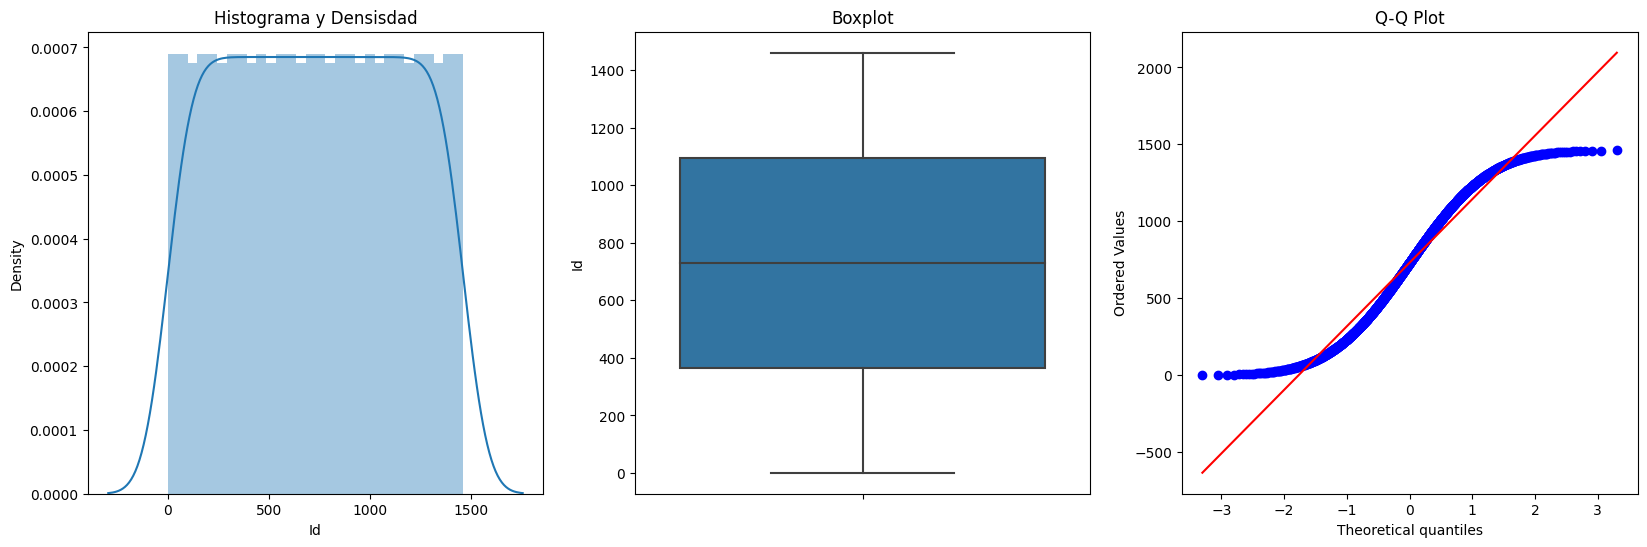

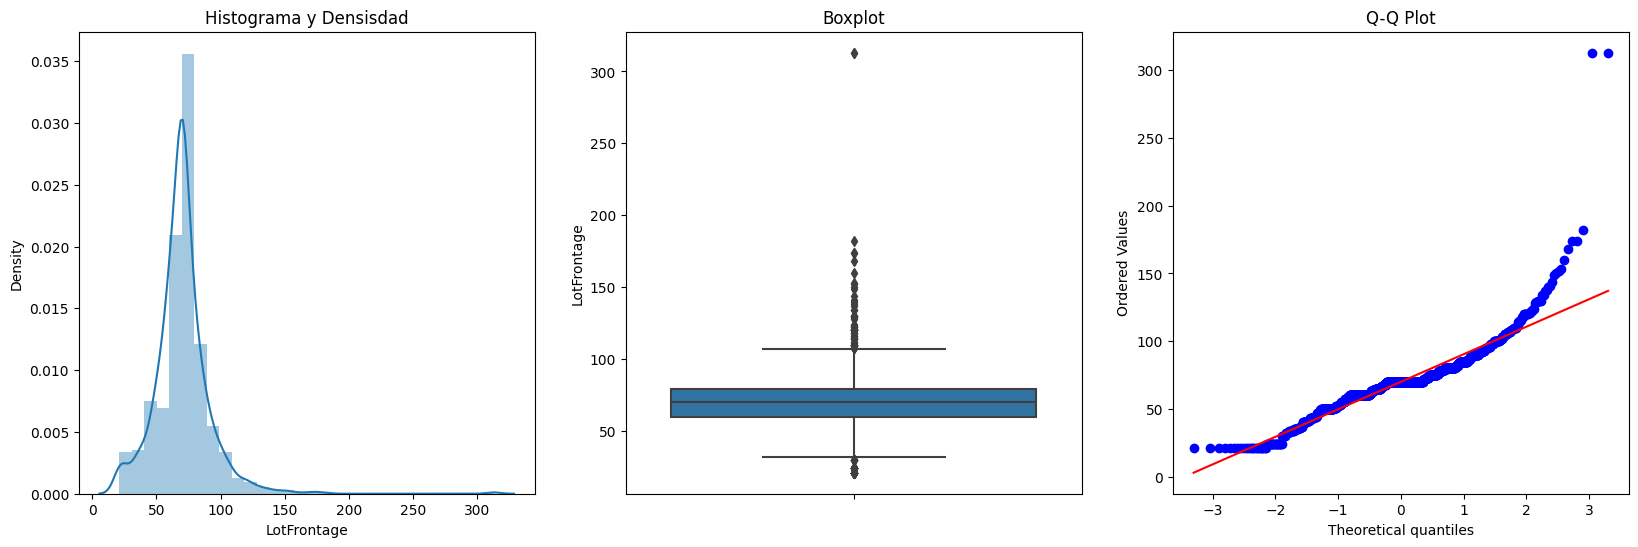

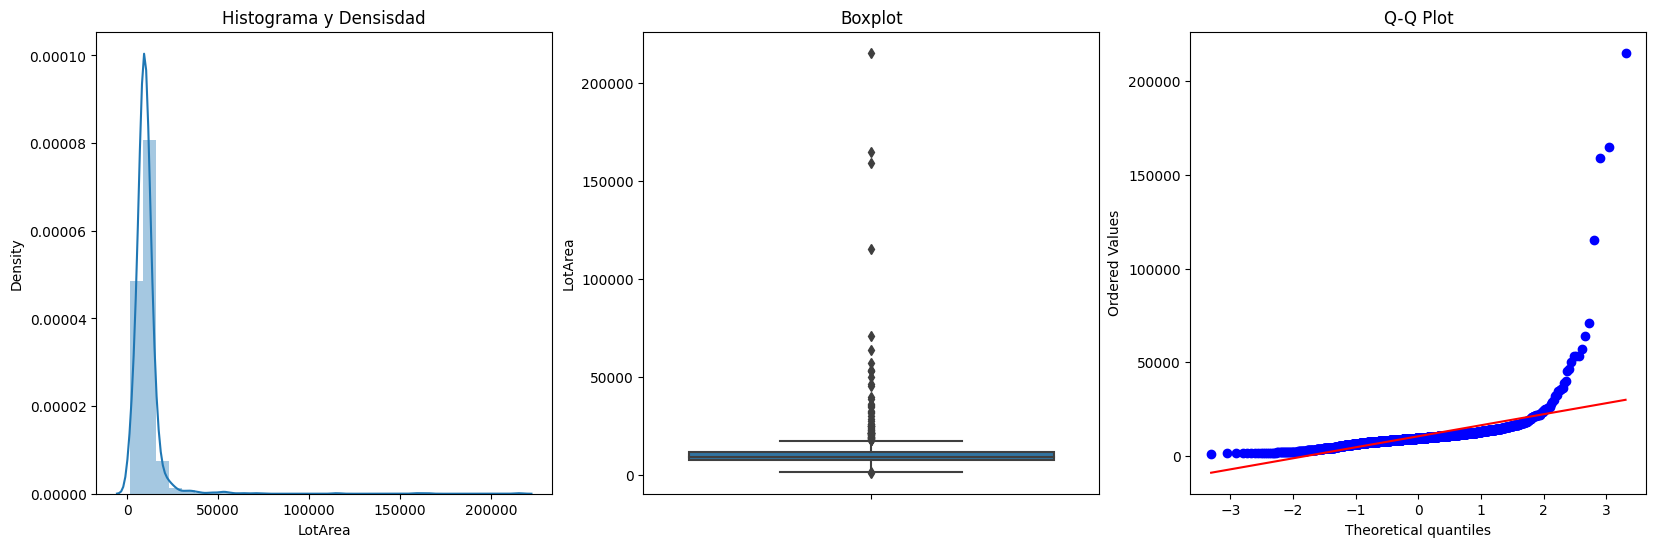

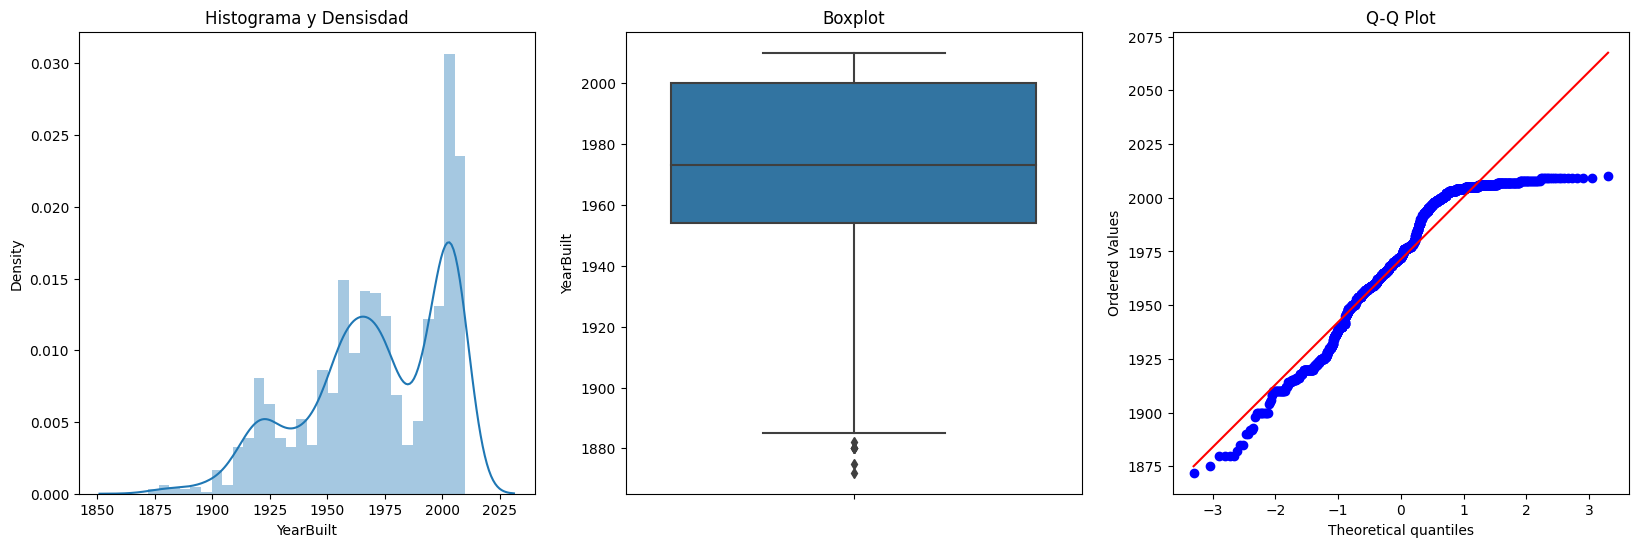

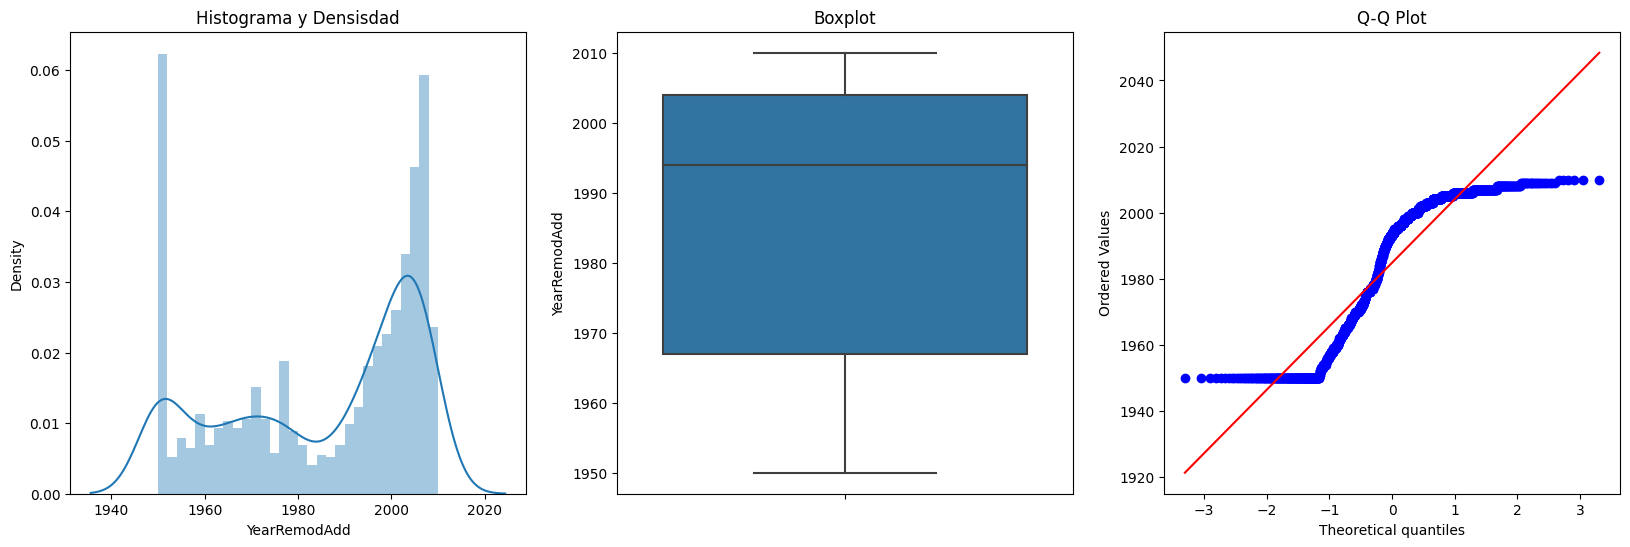

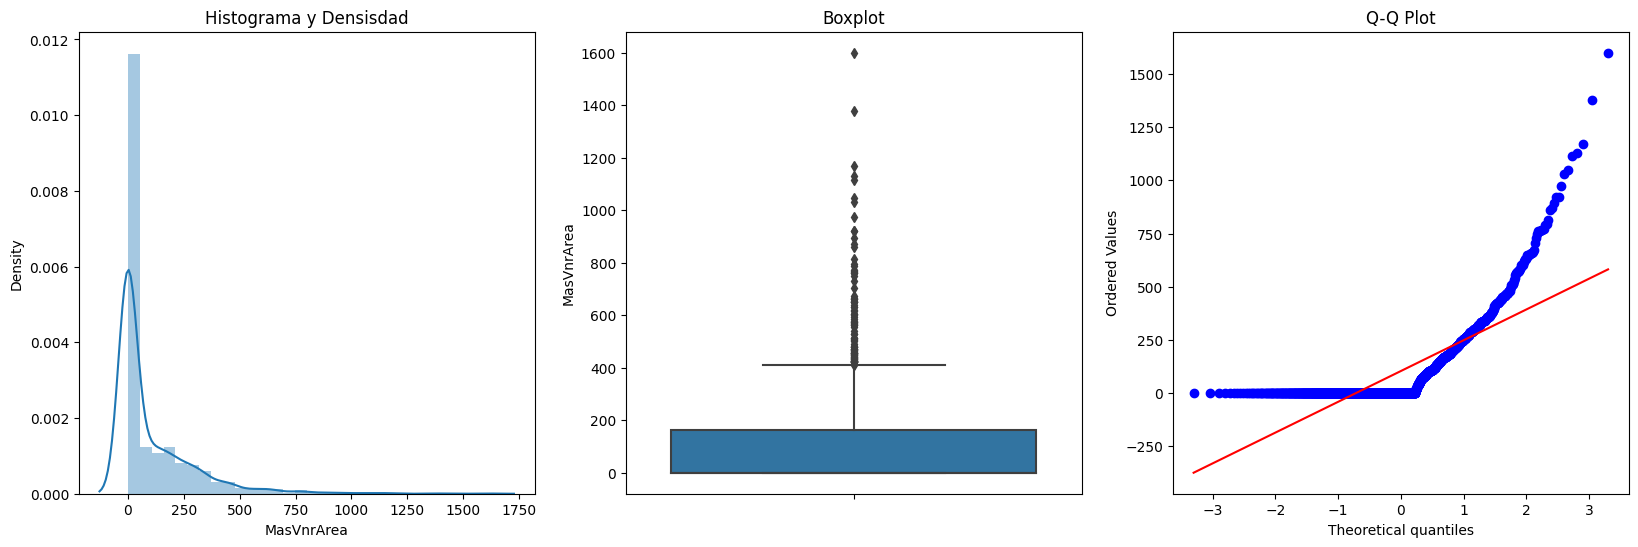

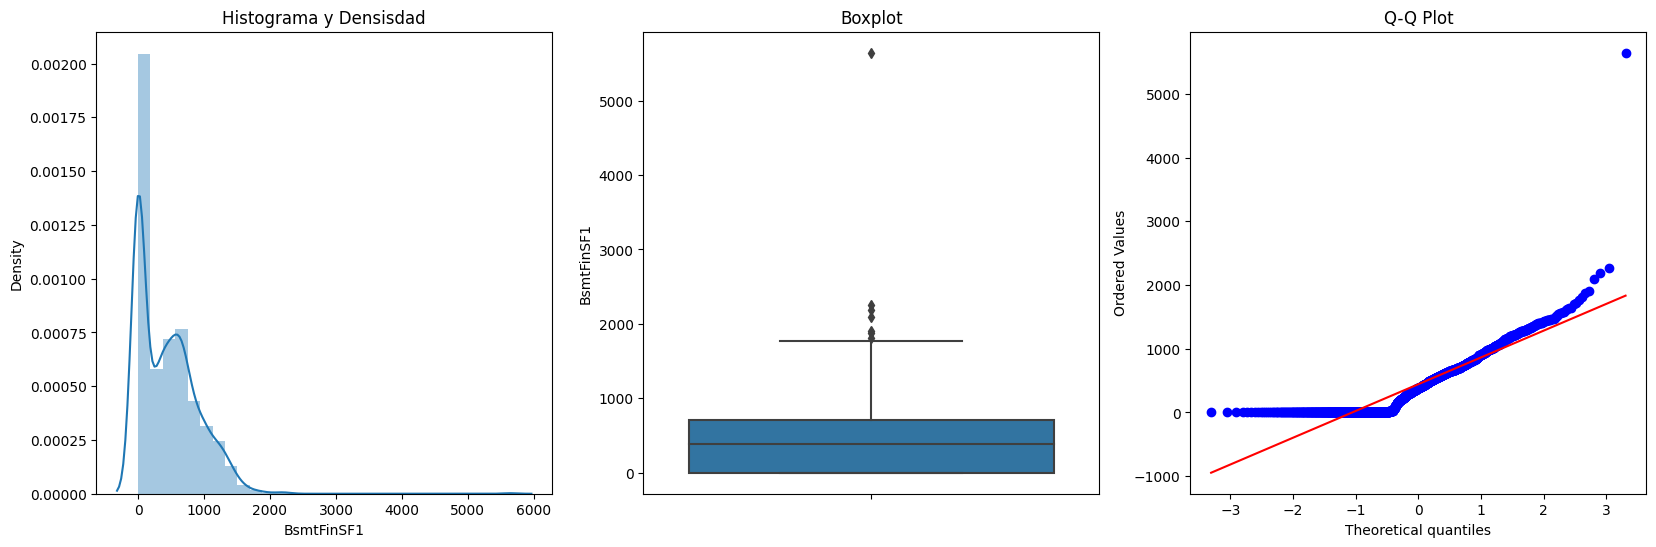

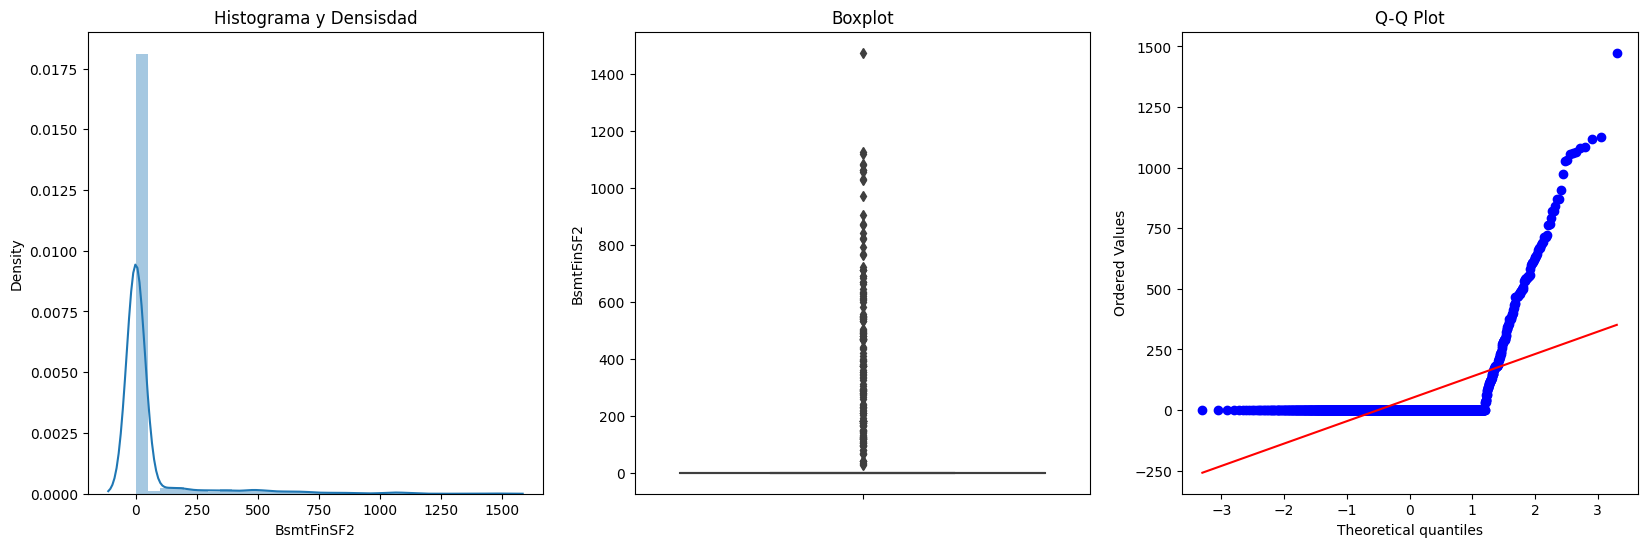

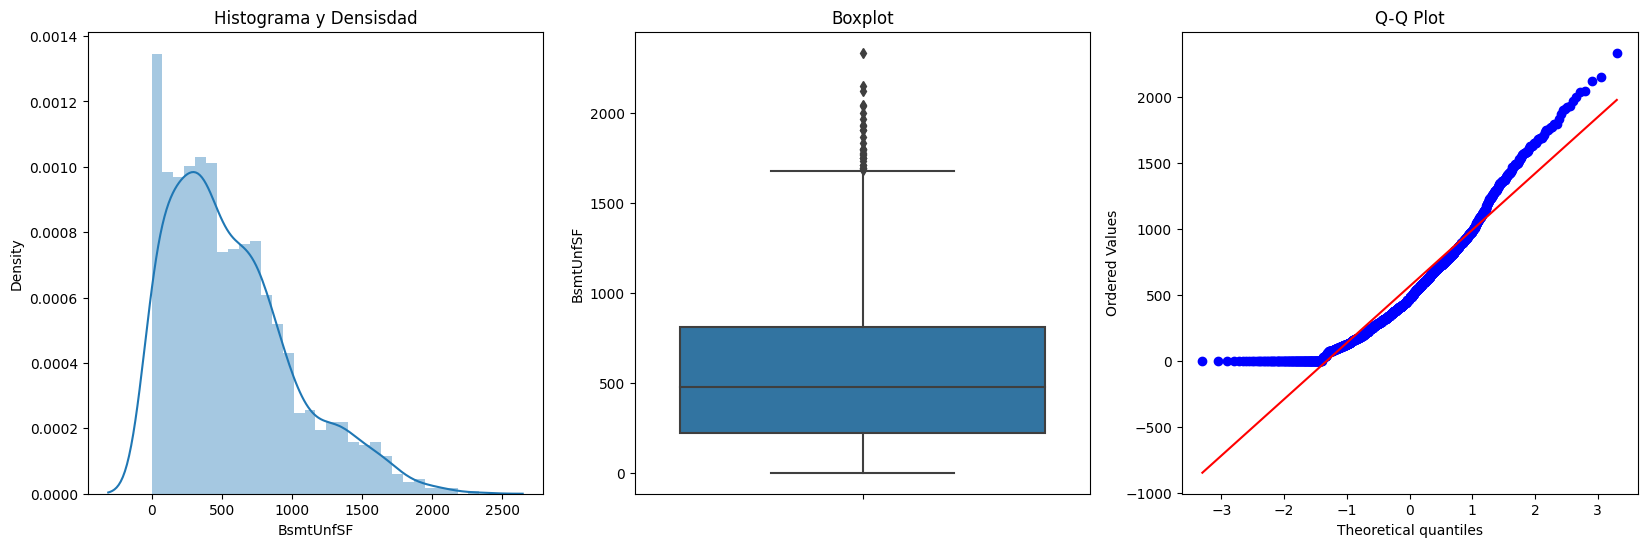

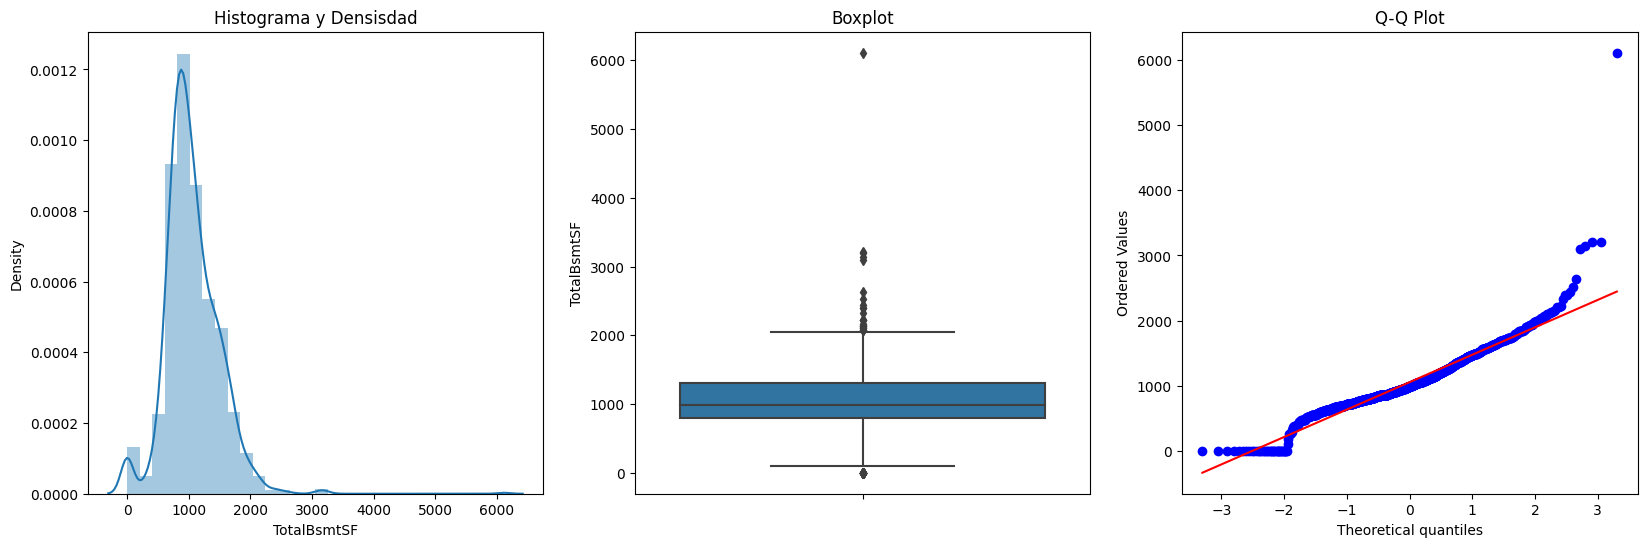

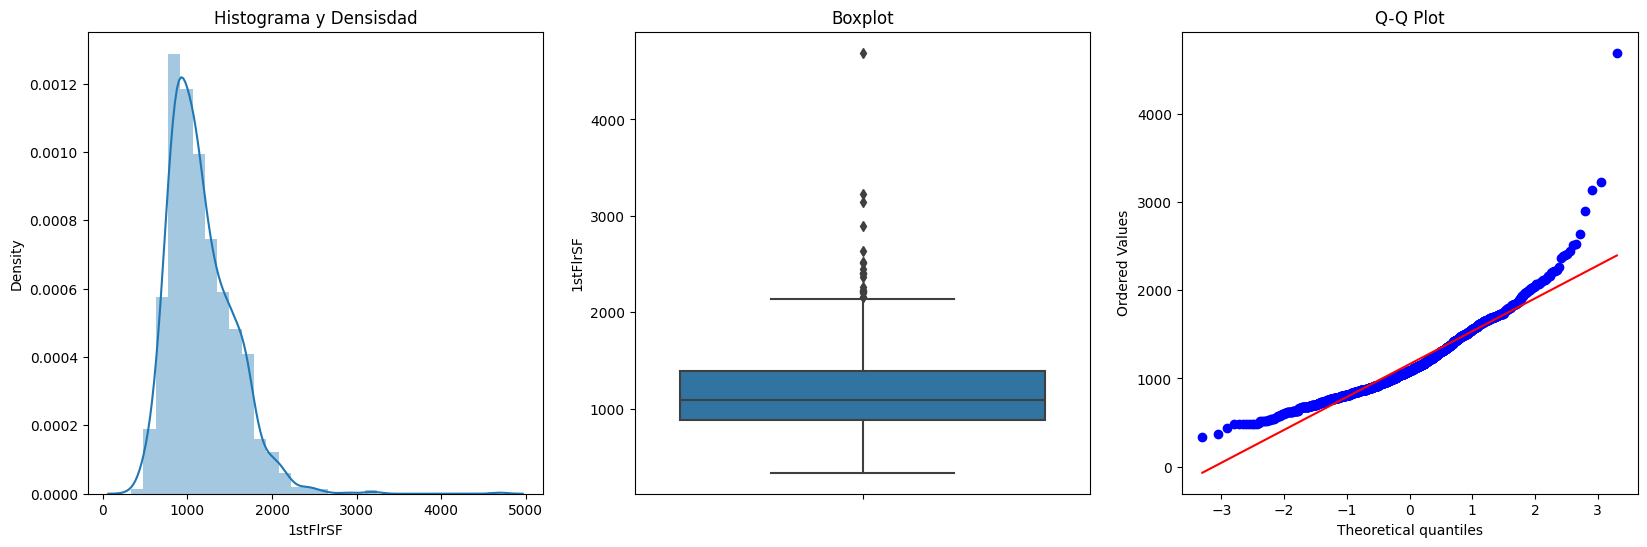

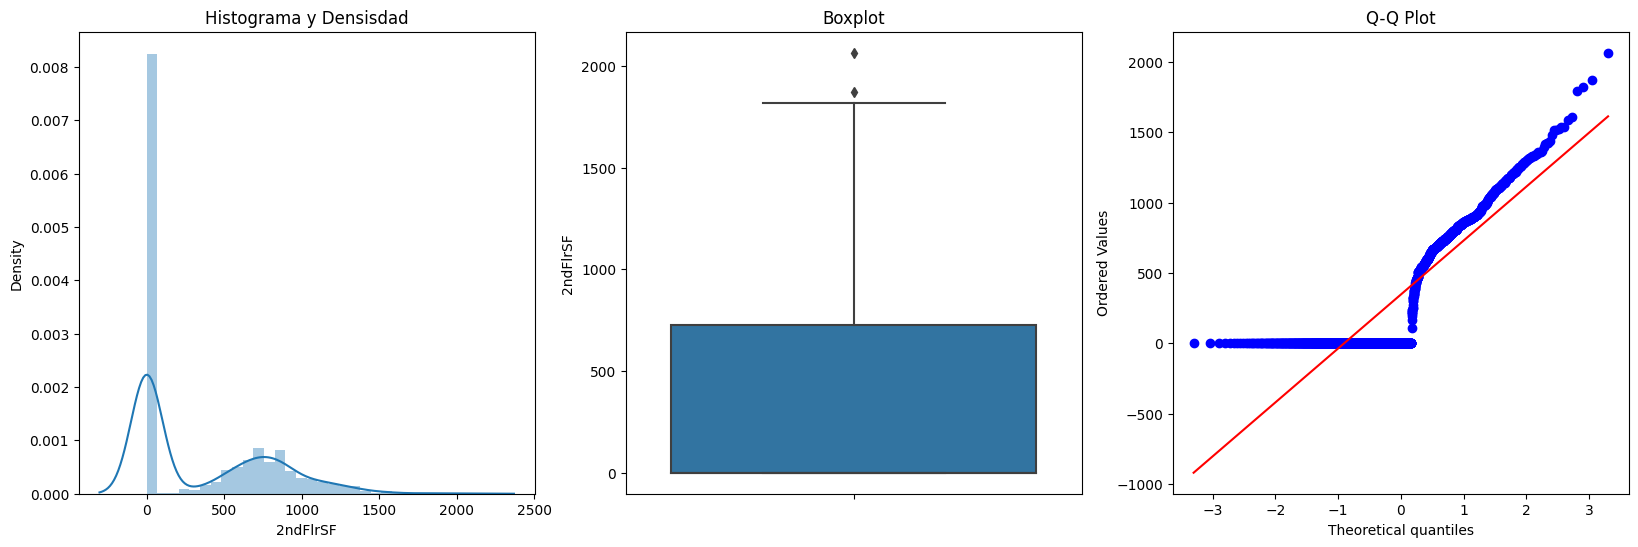

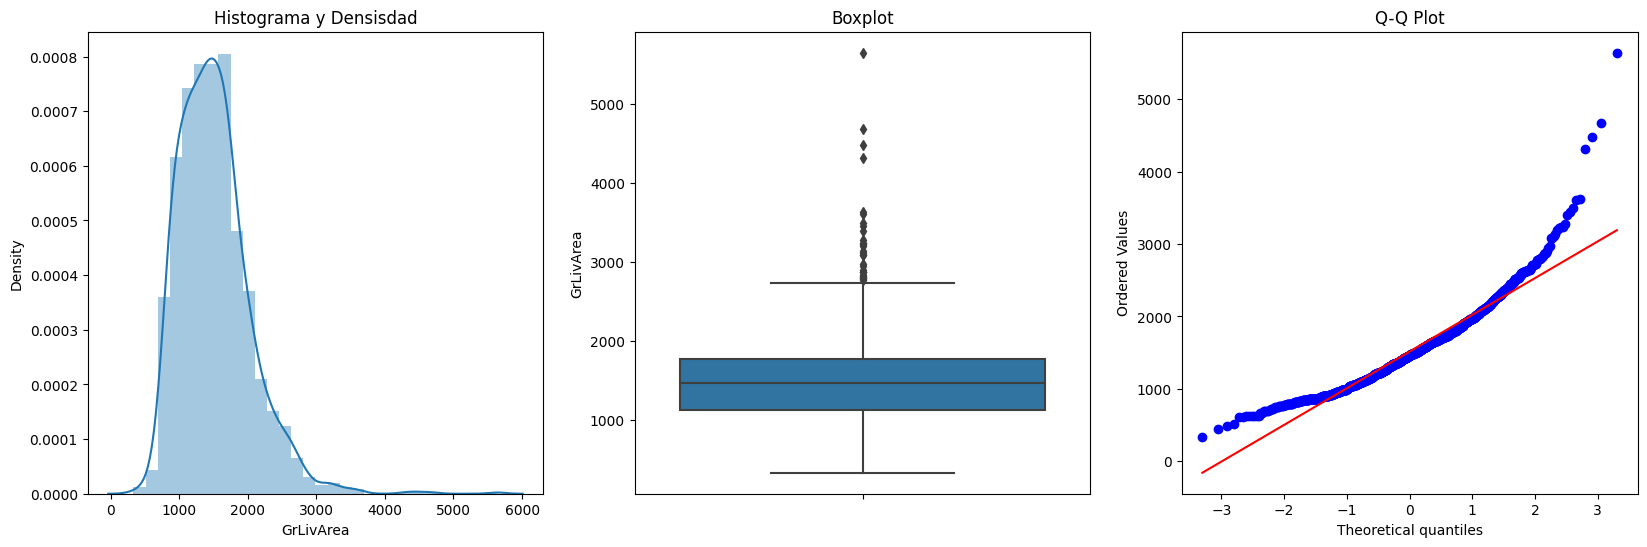

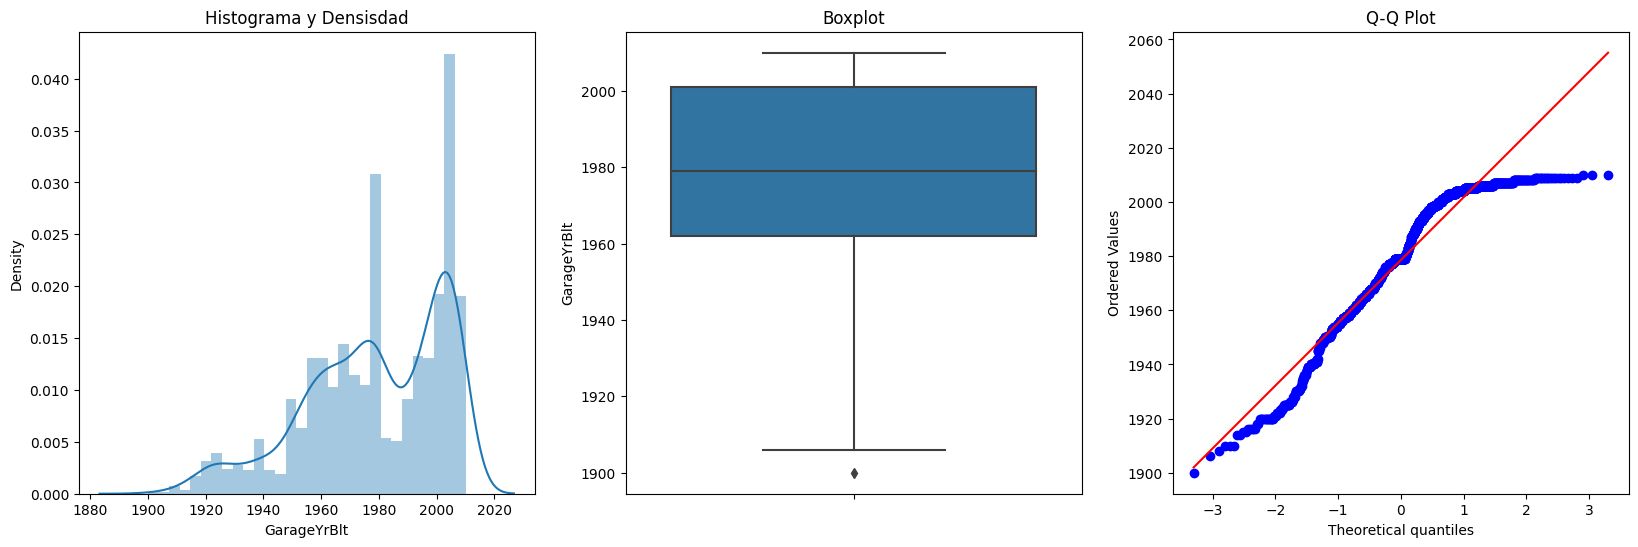

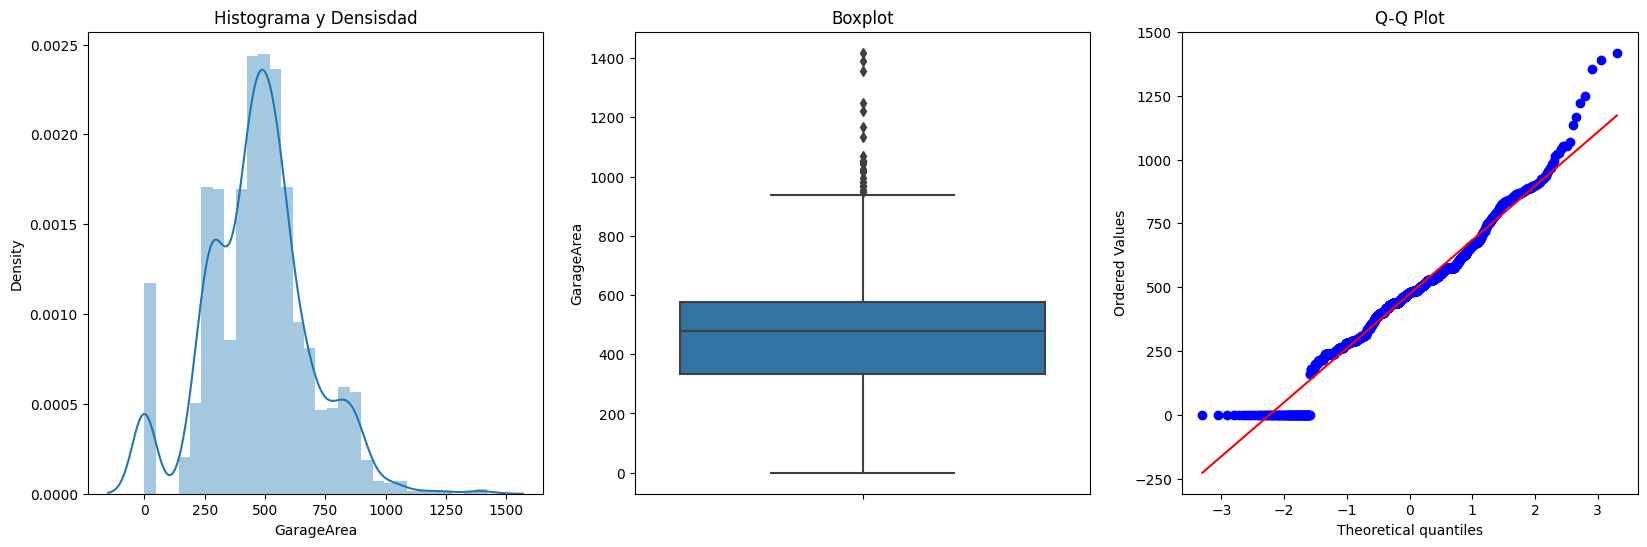

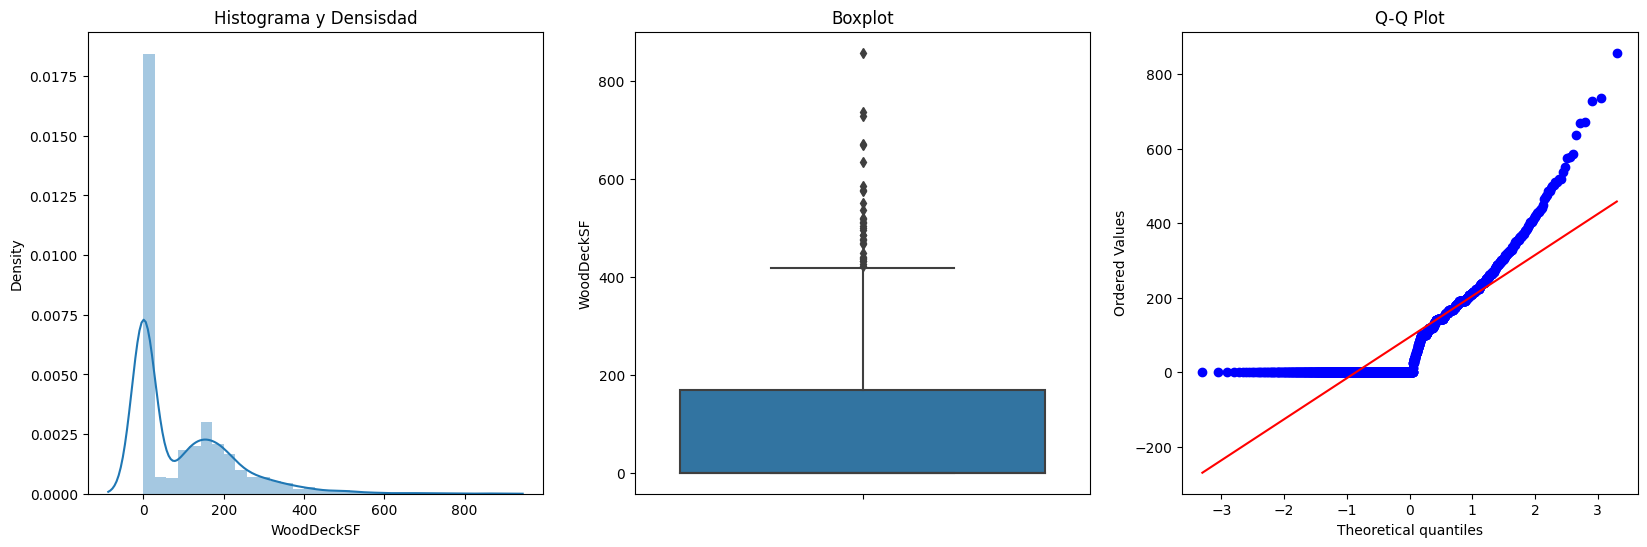

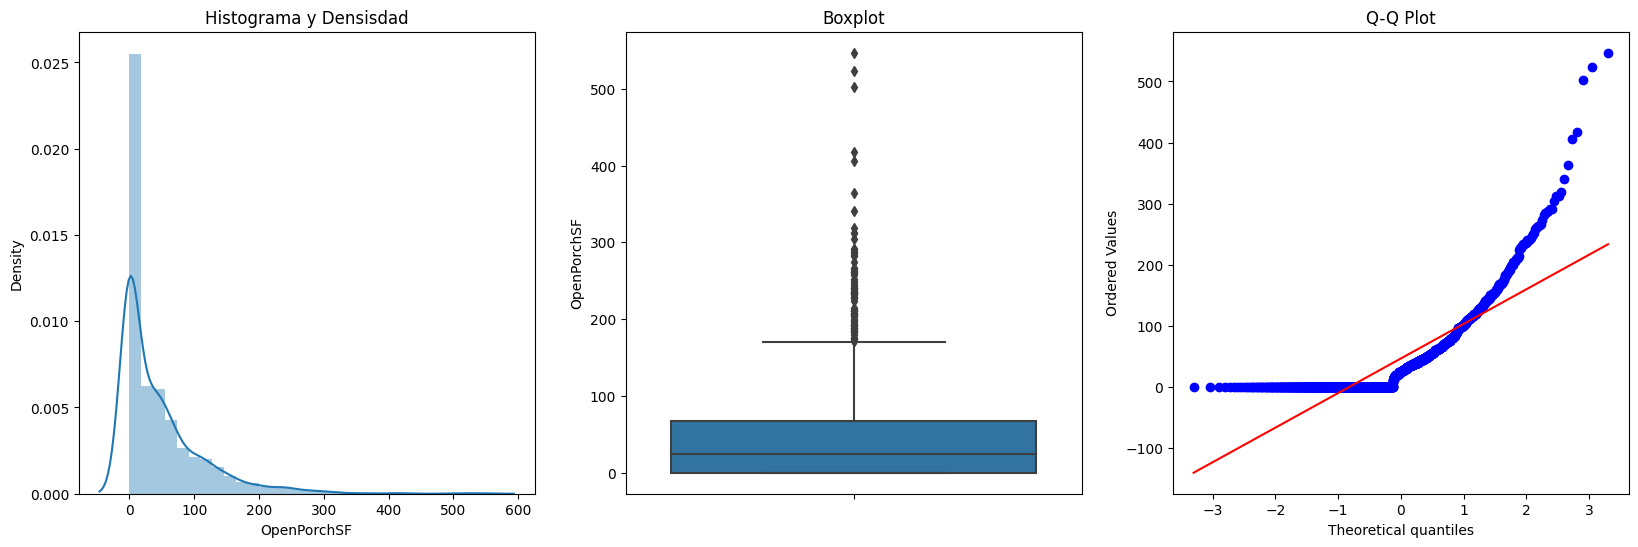

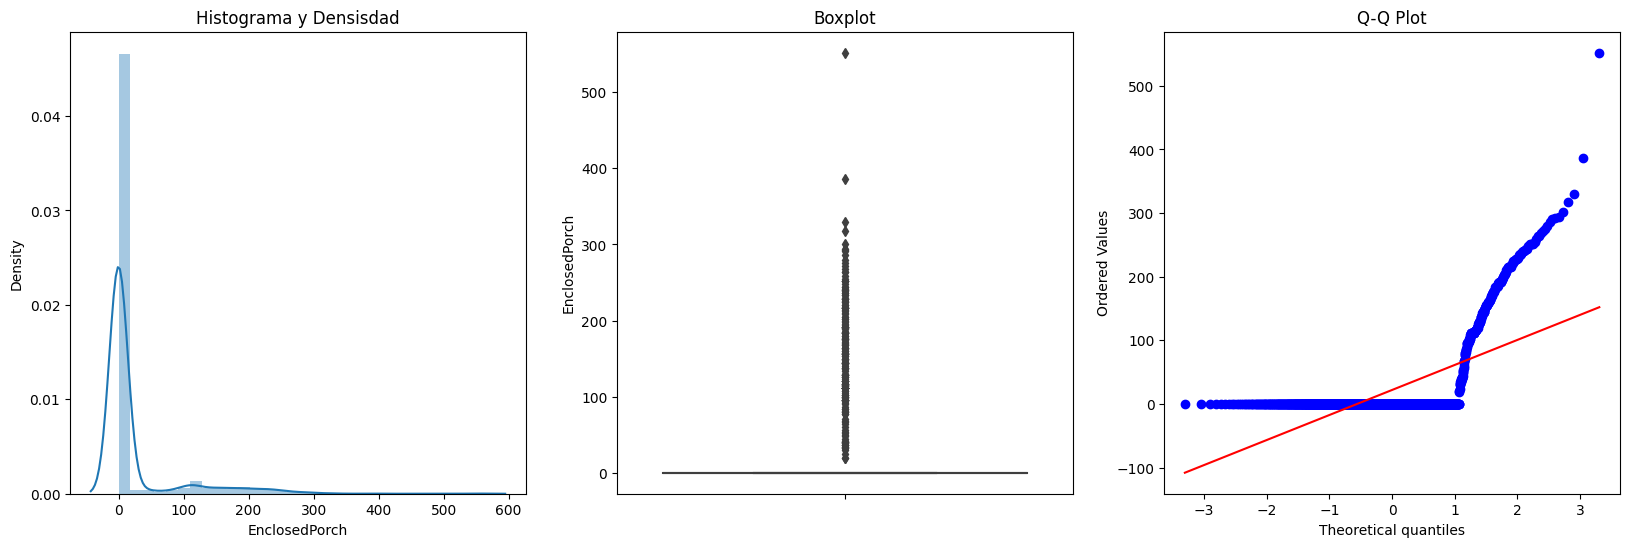

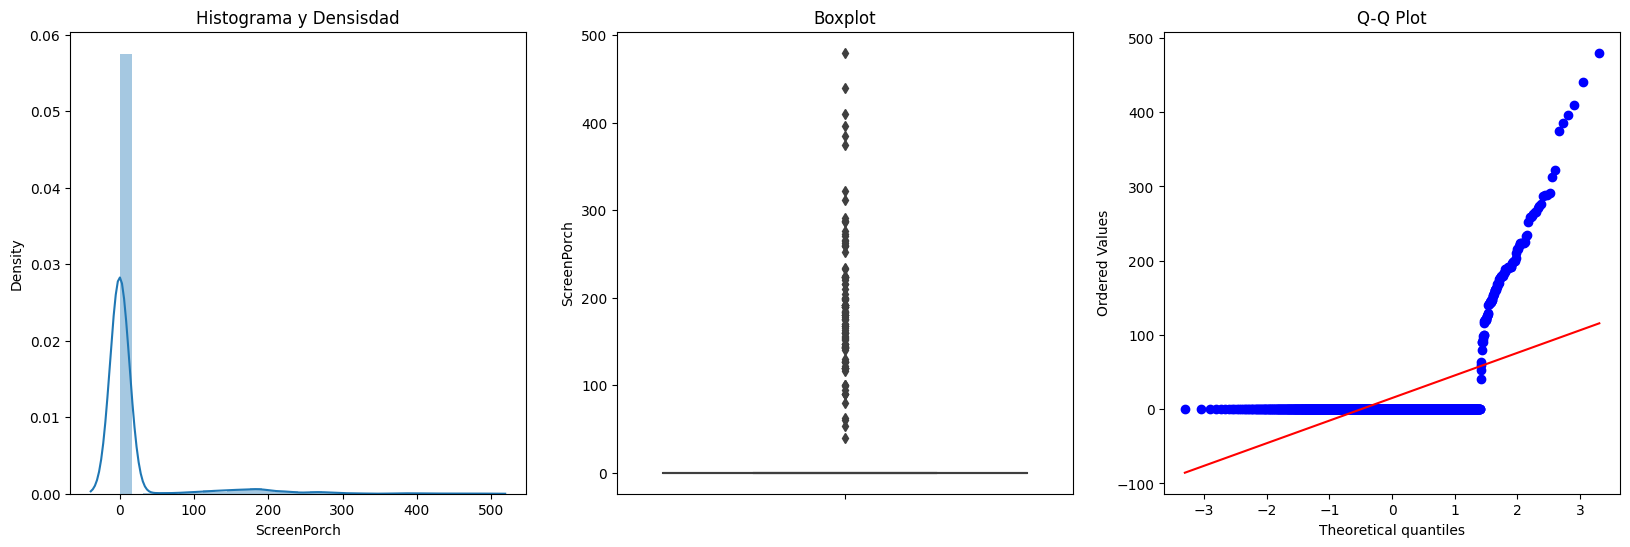

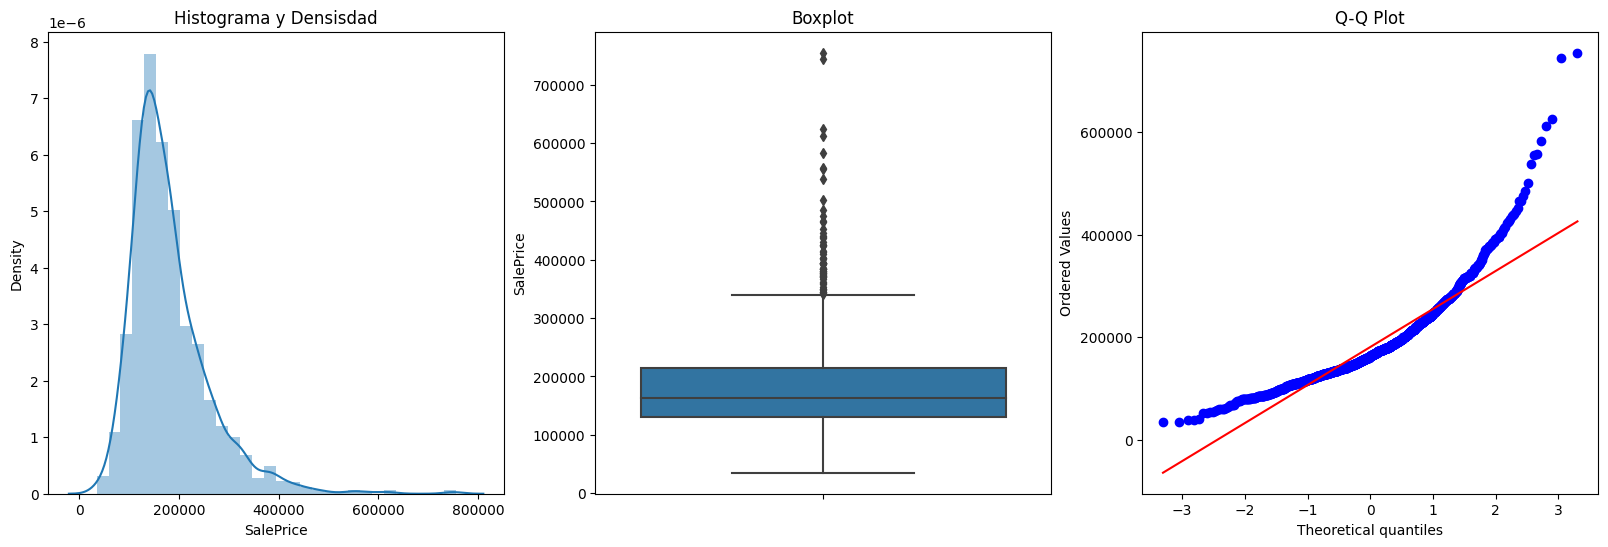

In [120]:
for colname in continuas:
    plotDistBoxQQ(dataHP, colname)

In [121]:
def detectOutliersLimits(dataset, col):

     '''

     Descripción: Calcula los limites superiores e inferiores para detección de outliers.

     Input: dataset-> pandas dataframe, col -> string nombre de columna

     Output: tupla de floats con los limites superior e inferior

     '''

     IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)

     LI =  dataset[col].quantile(0.25) - (IQR*1.75)

     LS = dataset[col].quantile(0.75) + (IQR*1.75)

 

     return LI, LS

In [122]:
for col in continuas:
    LI, LS = detectOutliersLimits(dataHP, col)
    dataHP[col + '_Capping'] = np.where(dataHP[col] > LS, LS, 
                                     np.where(dataHP[col] < LI, LI, 
                                              dataHP[col]))

C:\Users\Dev1\AppData\Local\Temp\ipykernel_20184\310458669.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)
C:\Users\Dev1\AppData\Local\Temp\ipykernel_20184\310458669.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)
C:\Users\Dev1\AppData\Loca

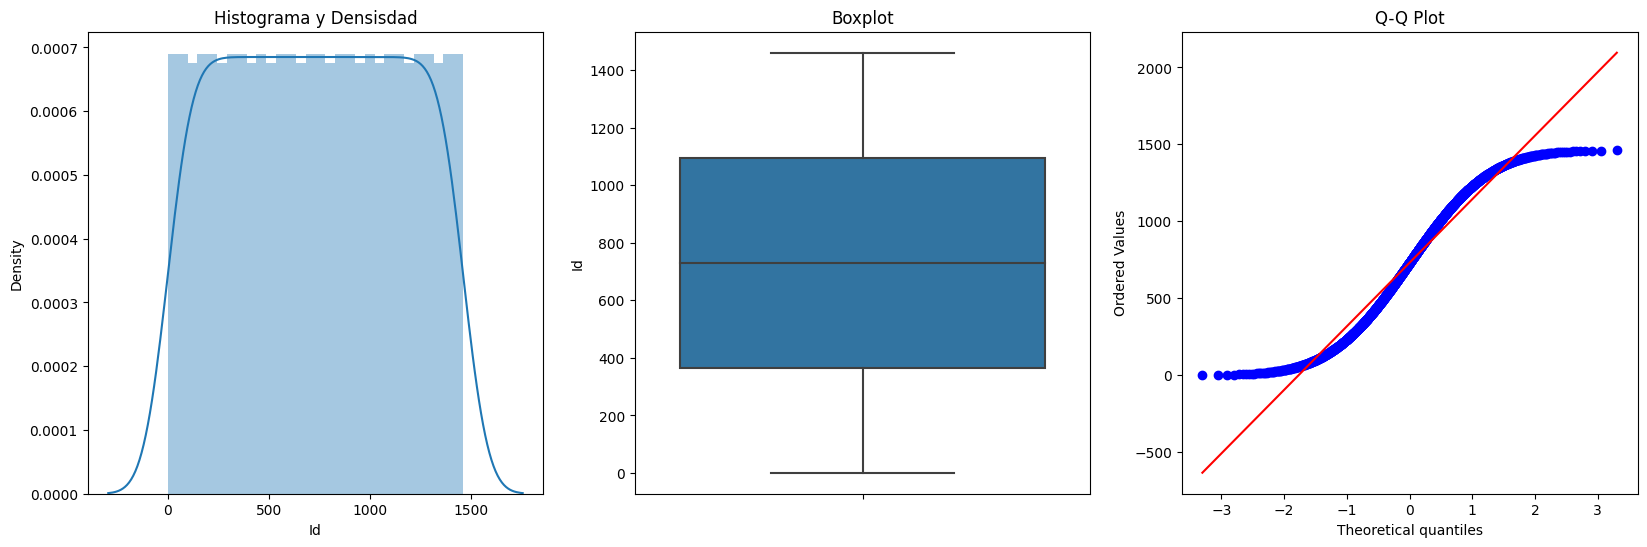

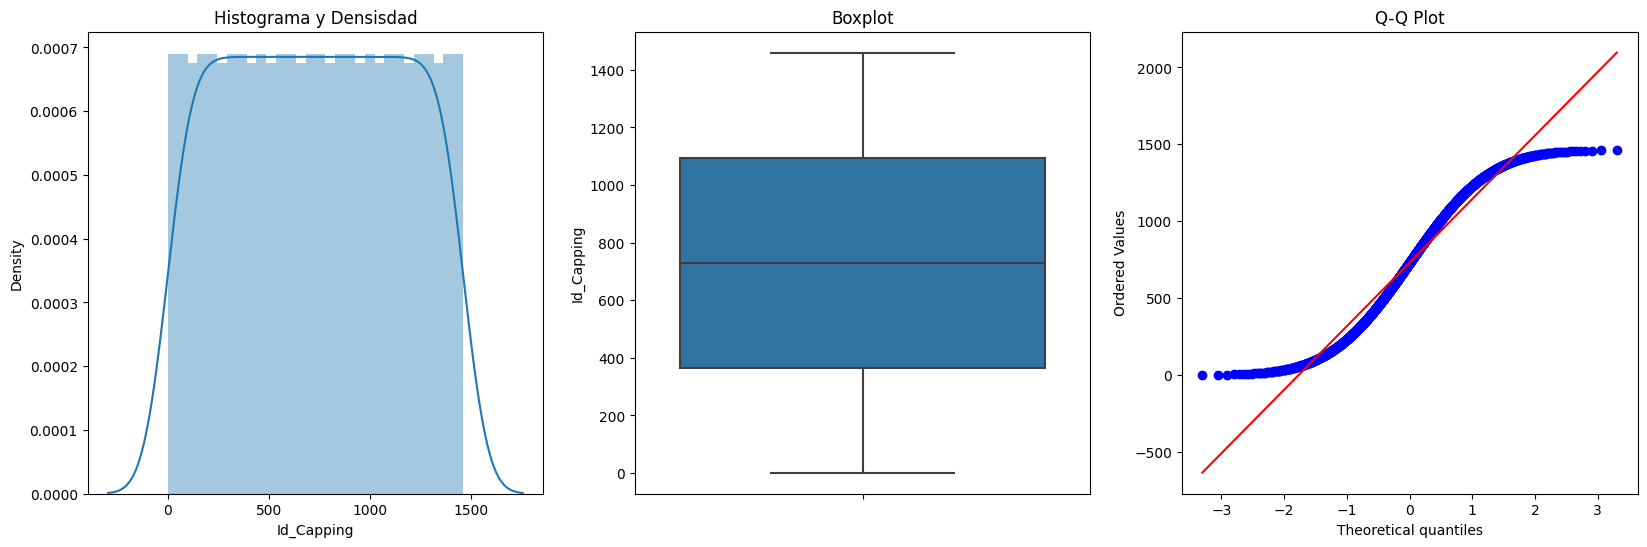

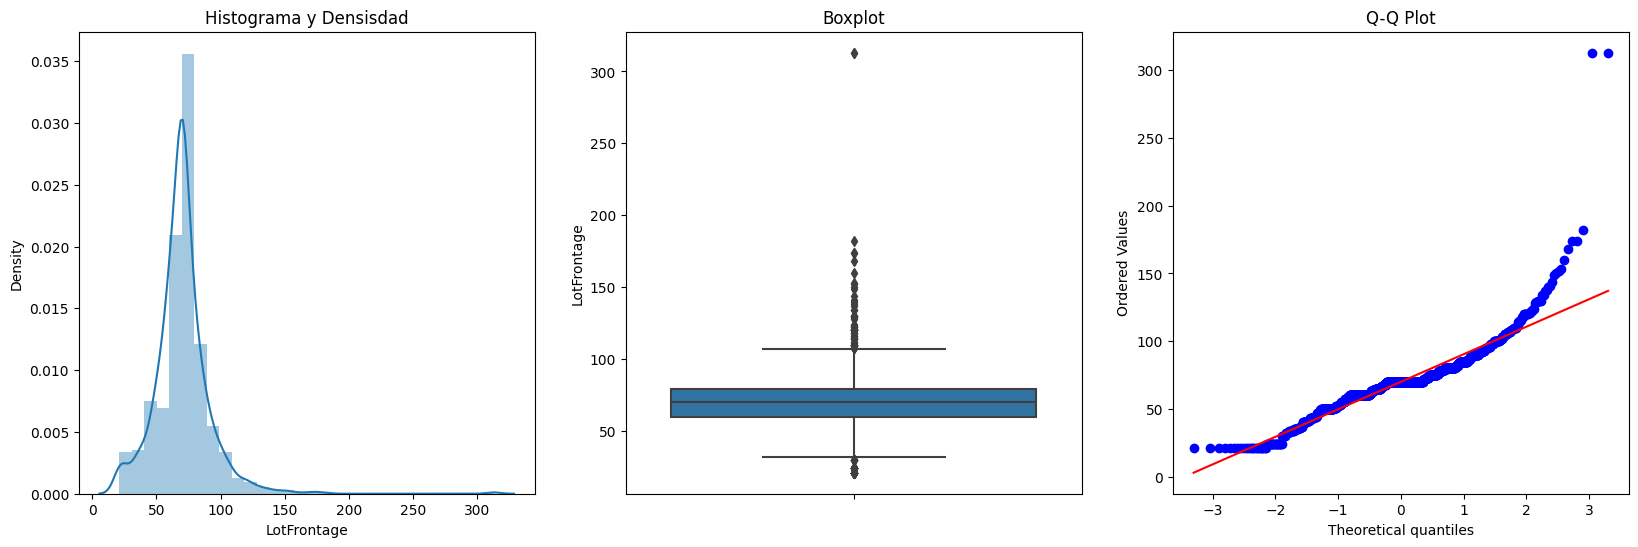

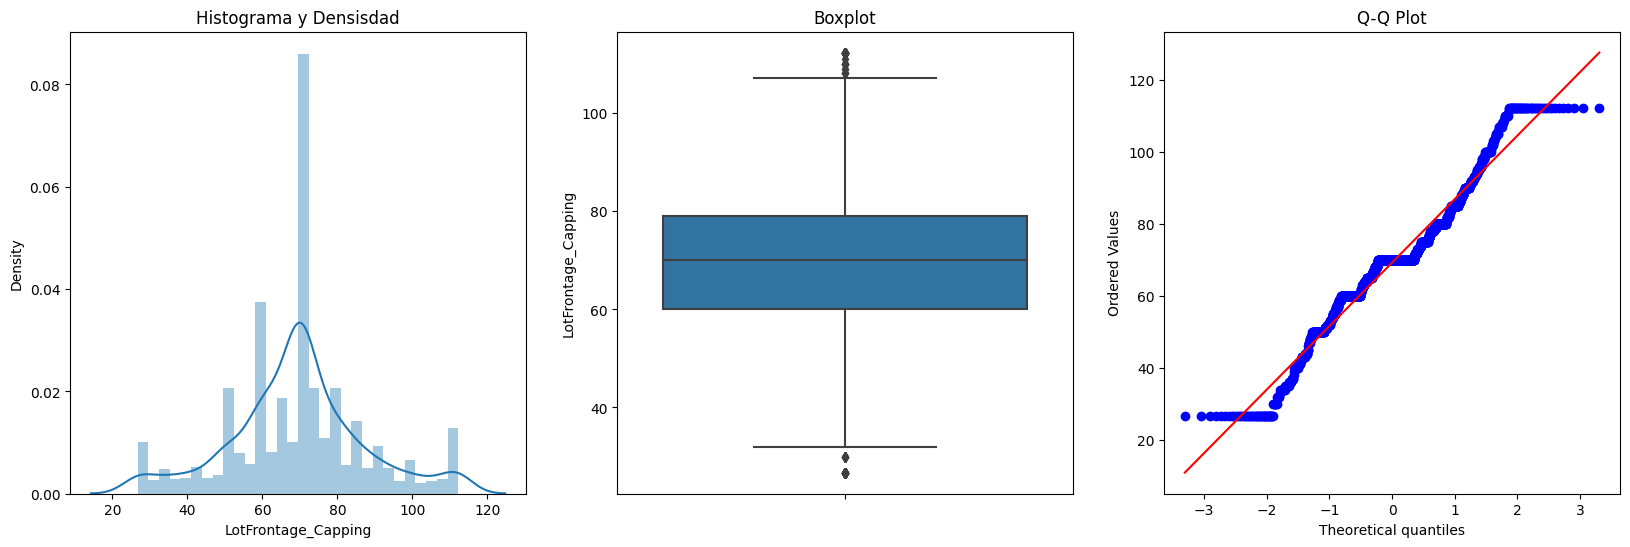

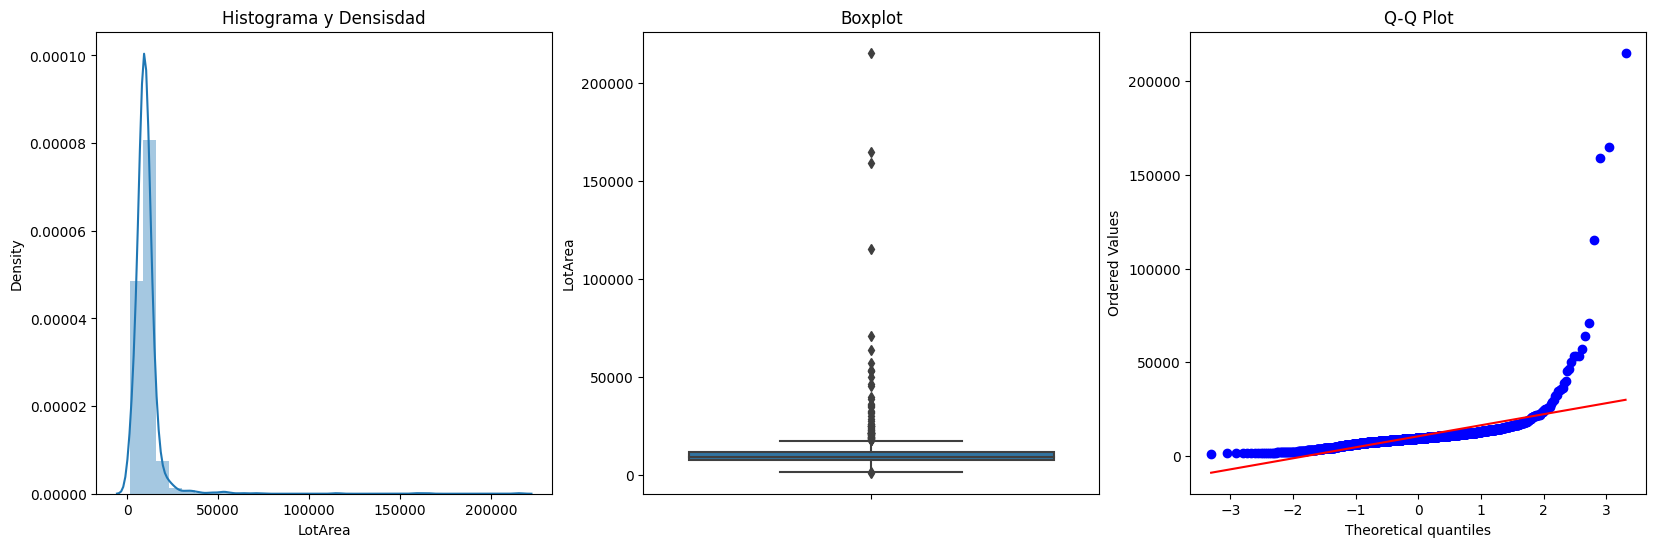

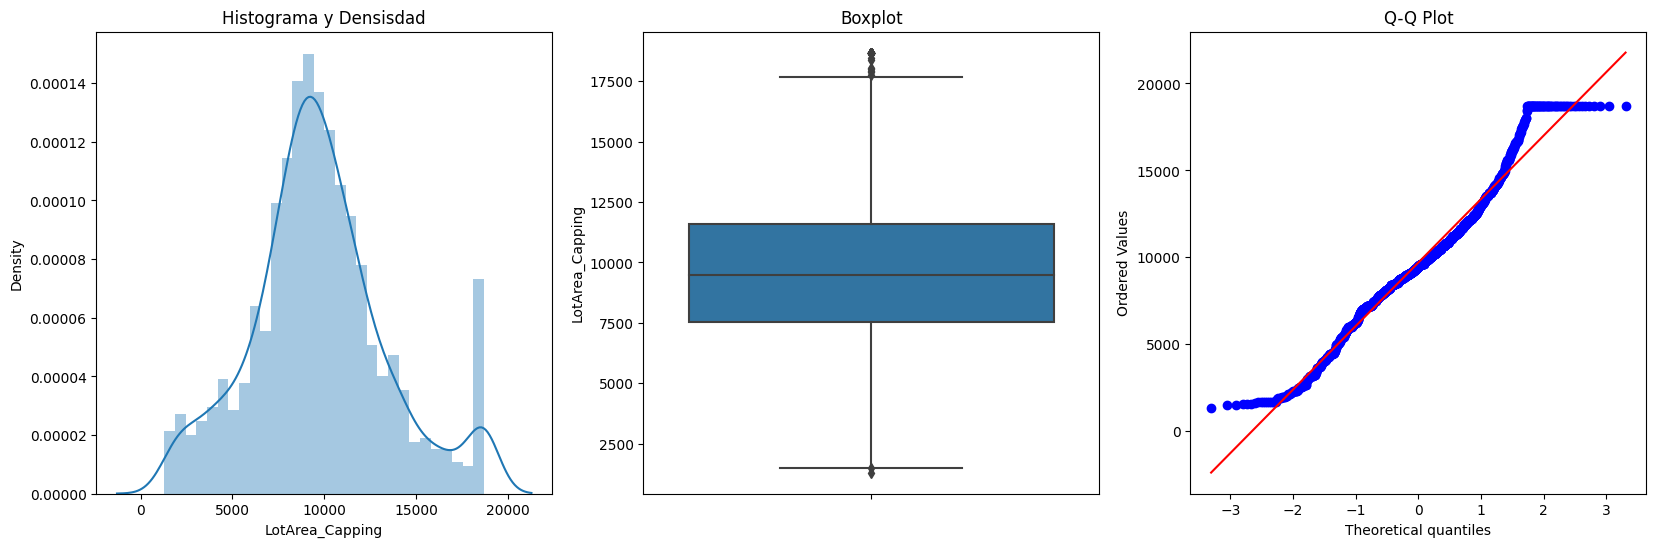

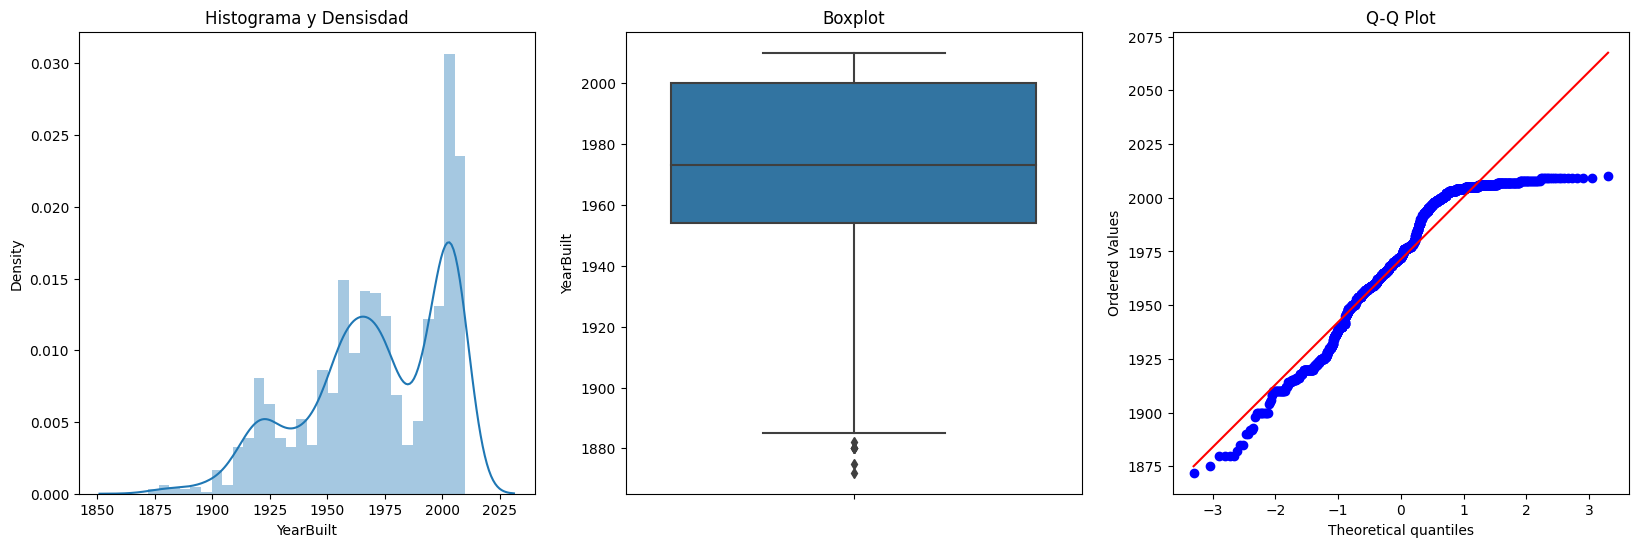

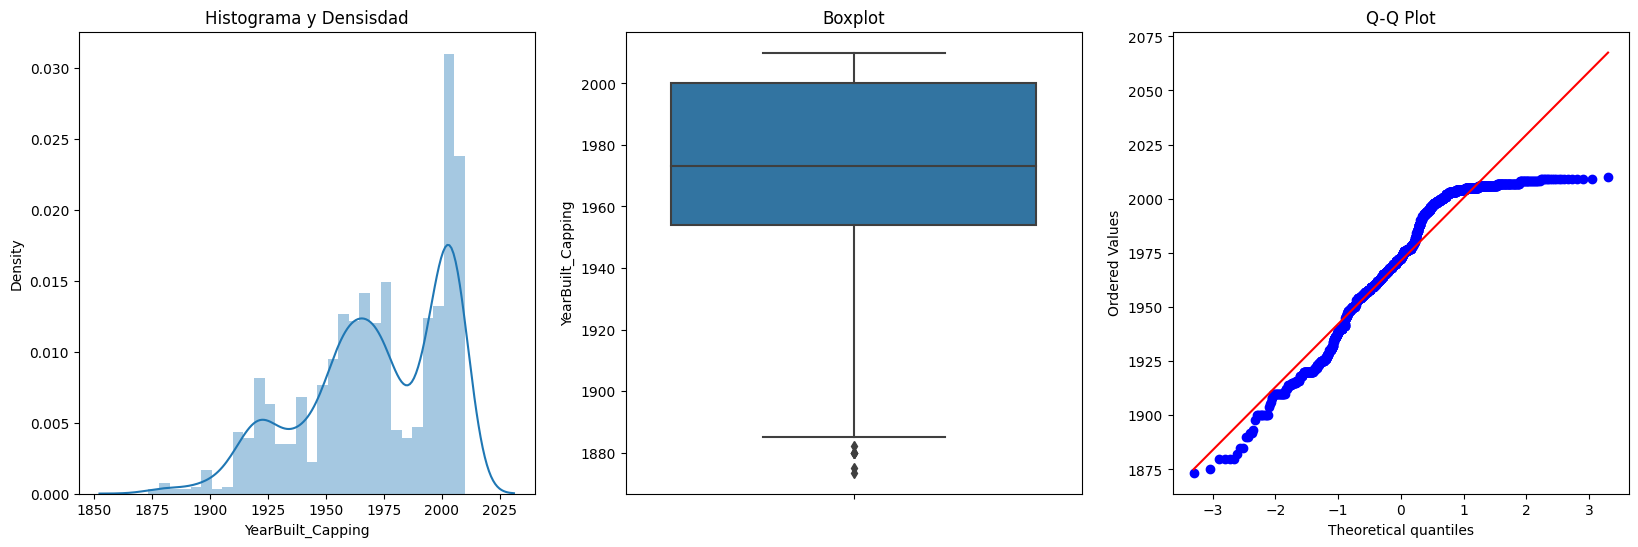

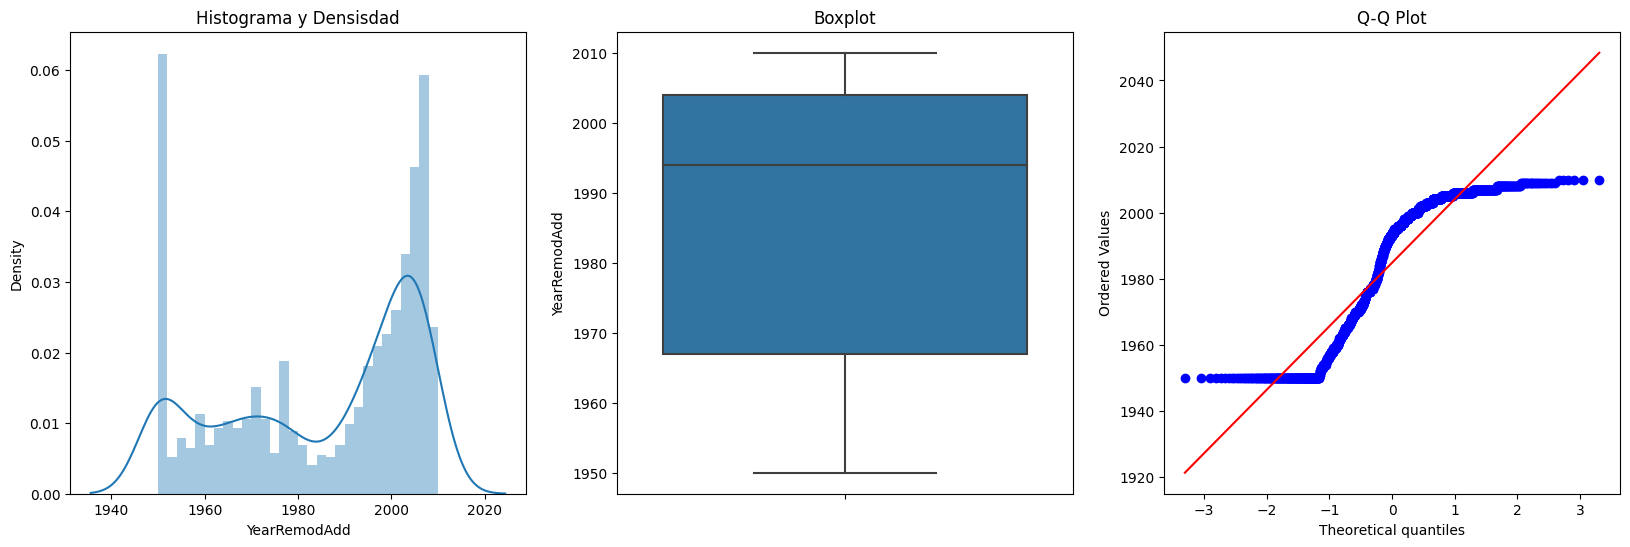

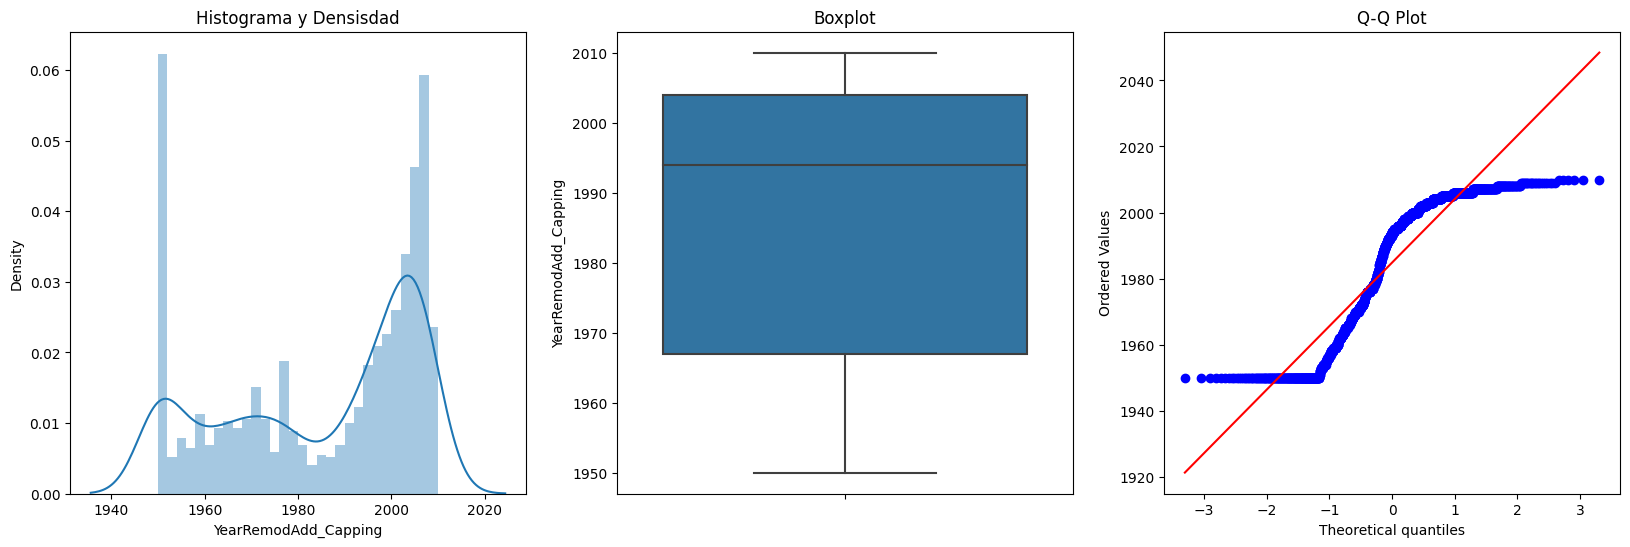

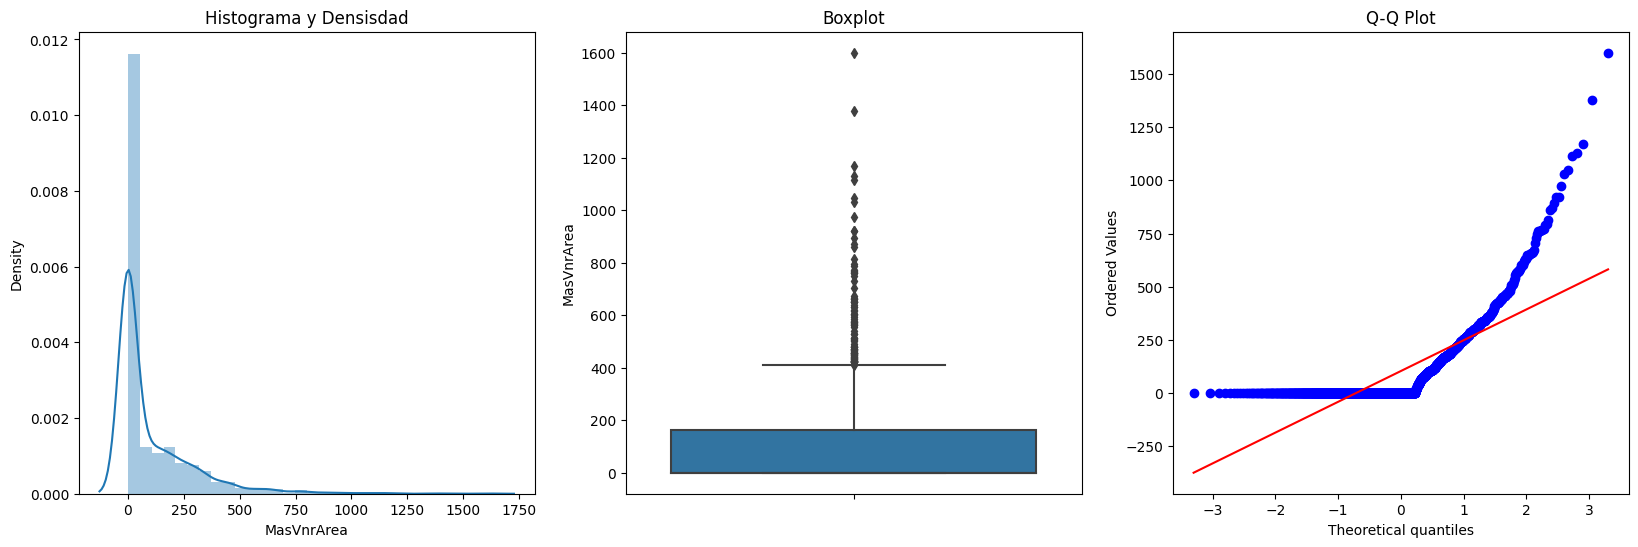

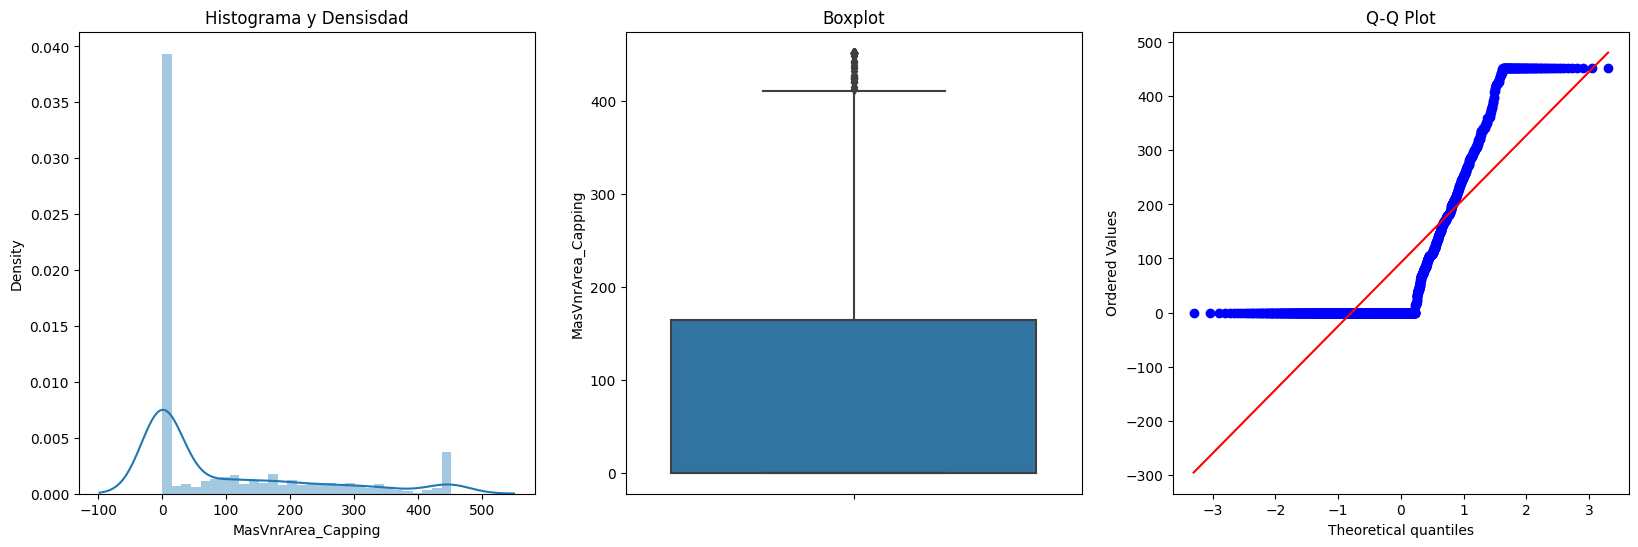

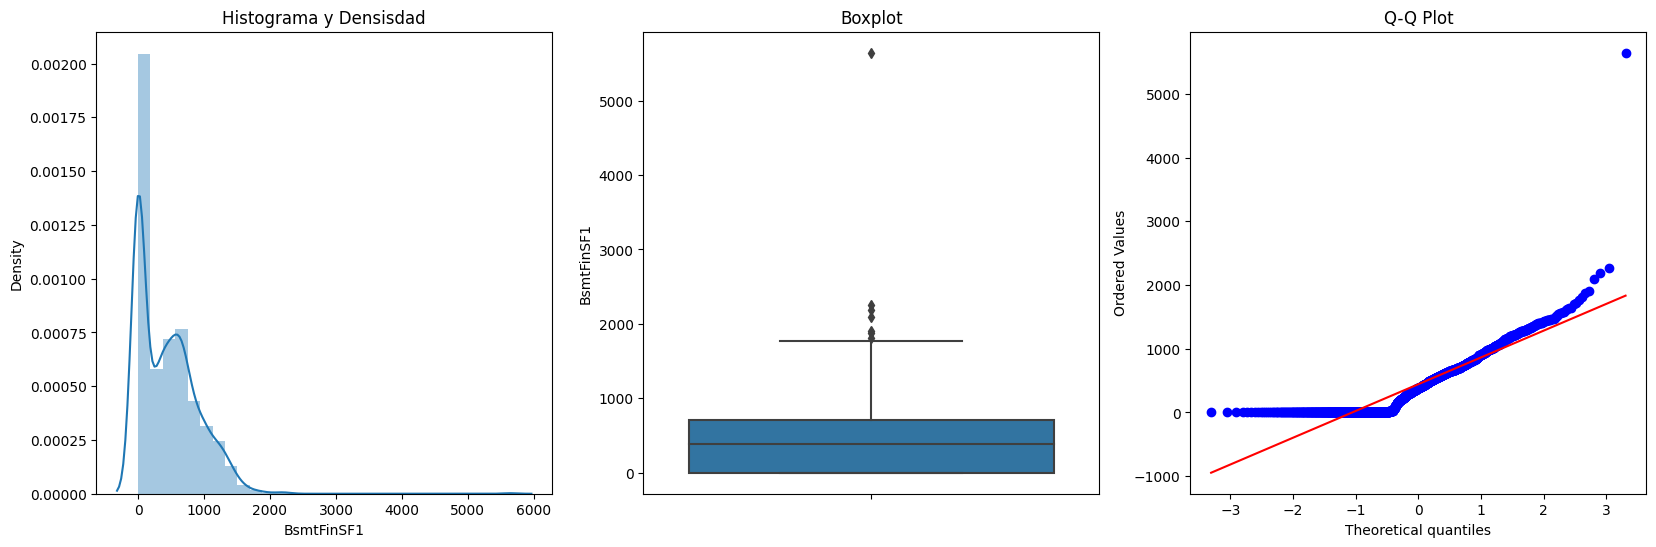

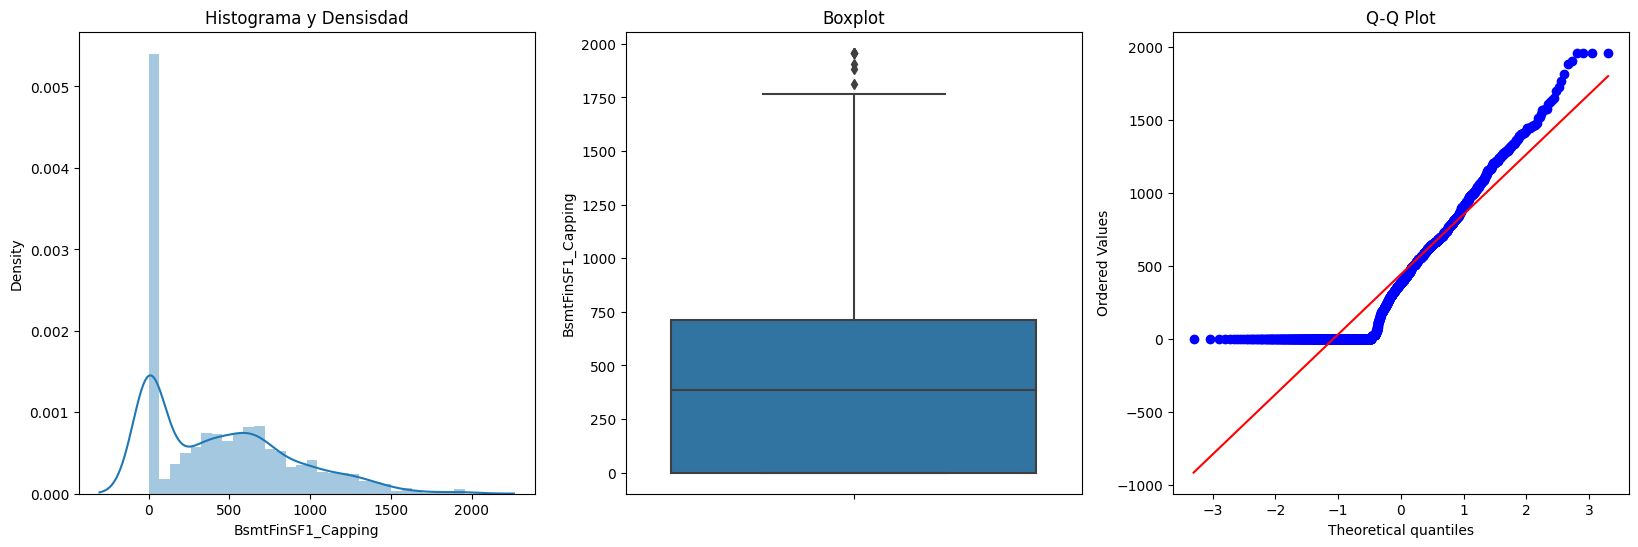

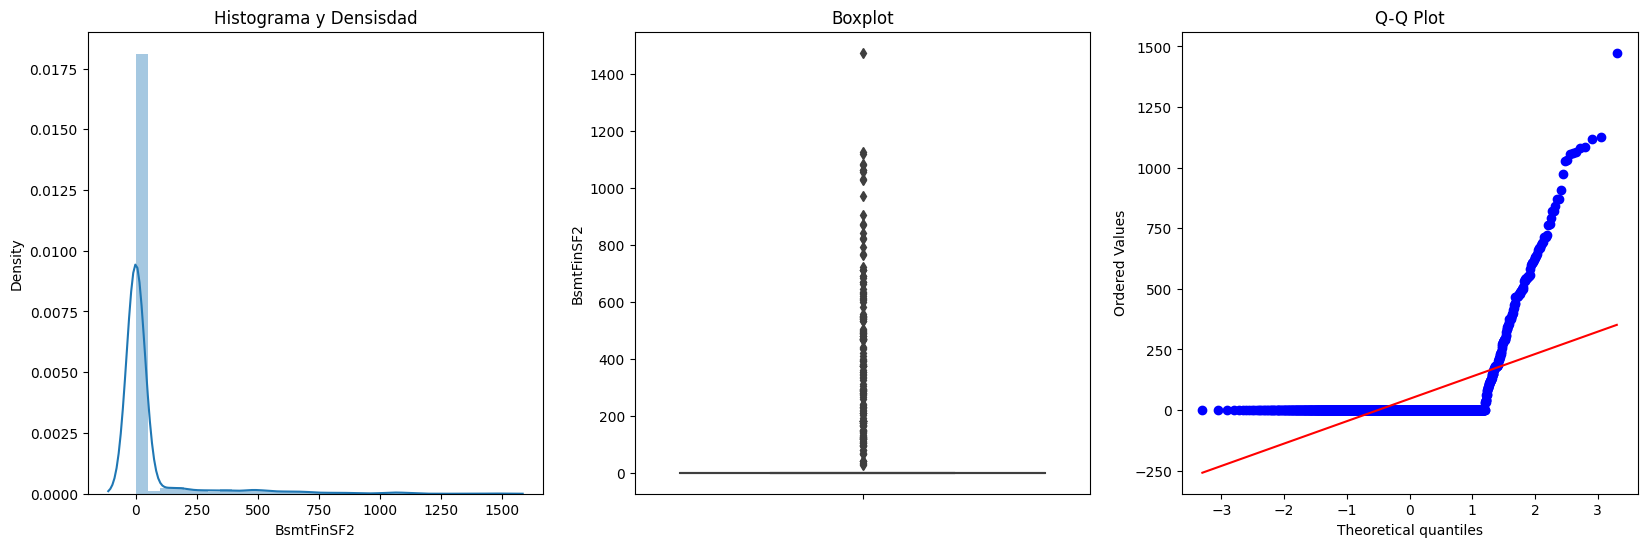

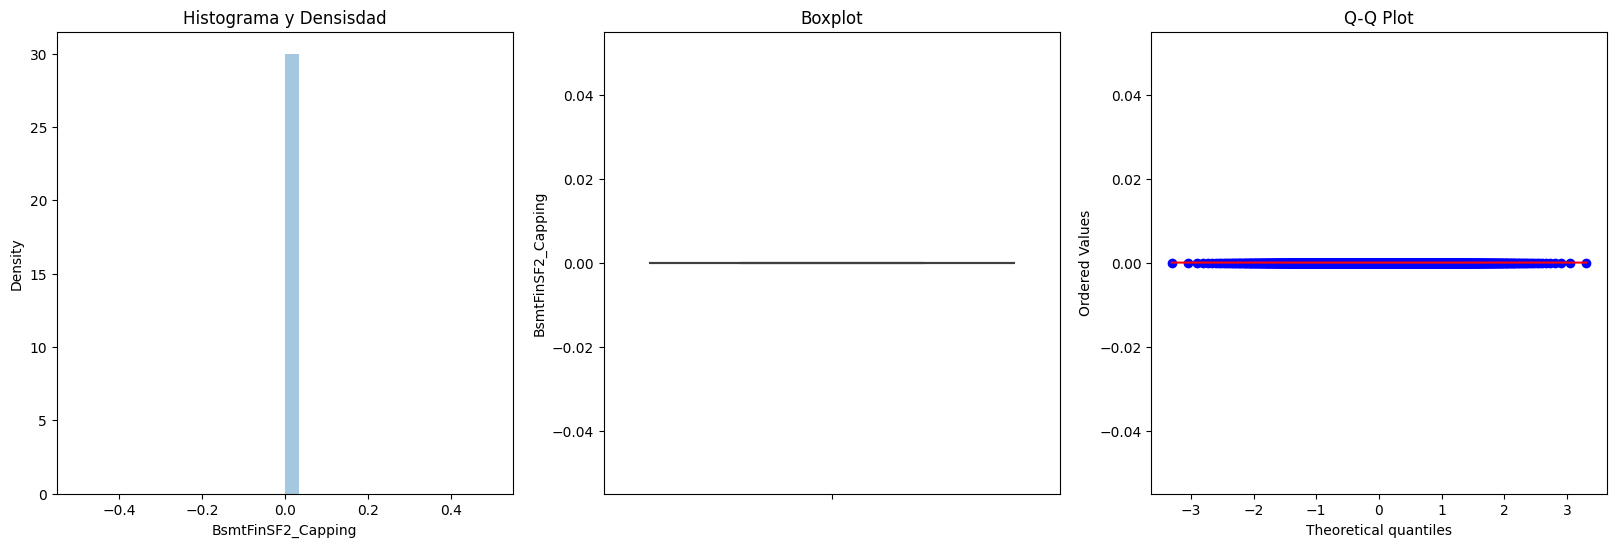

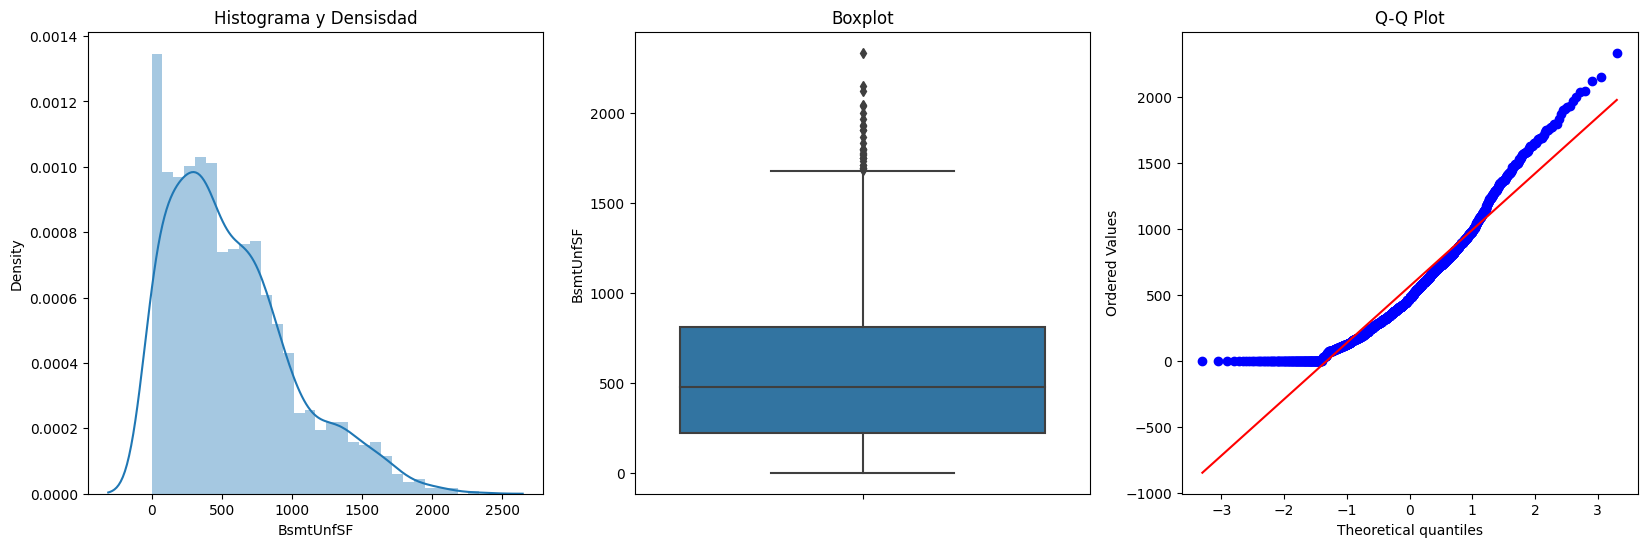

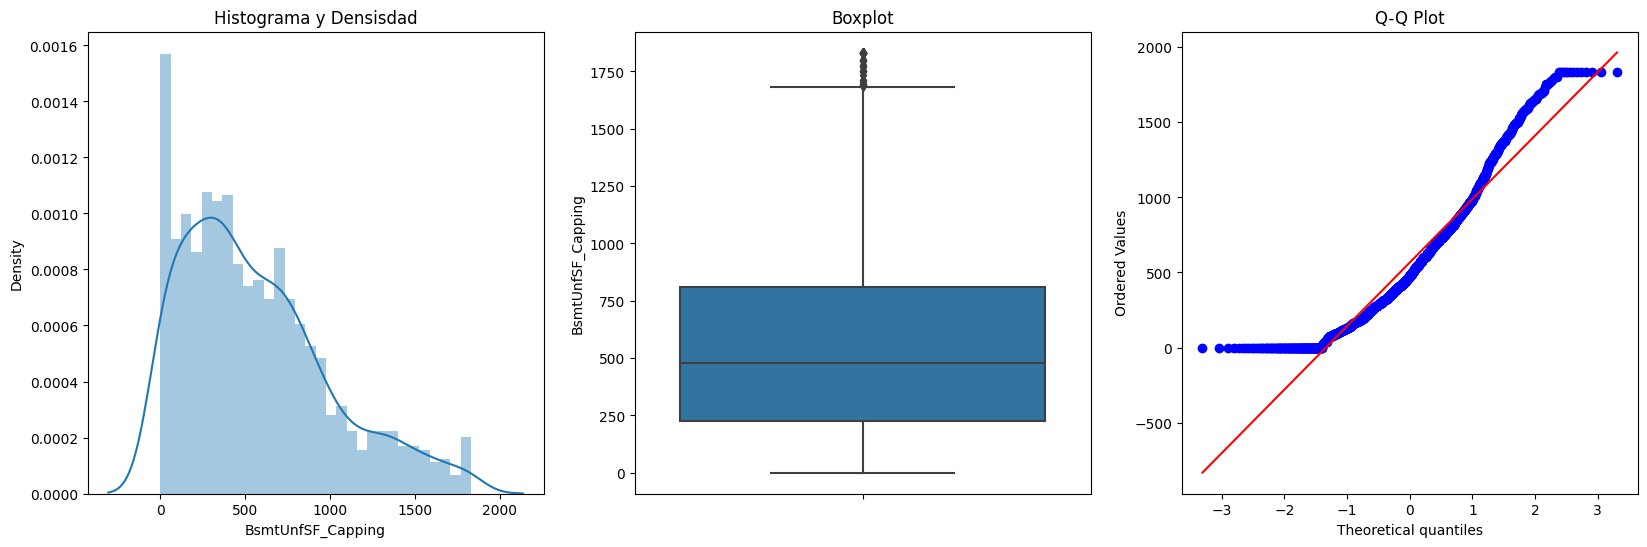

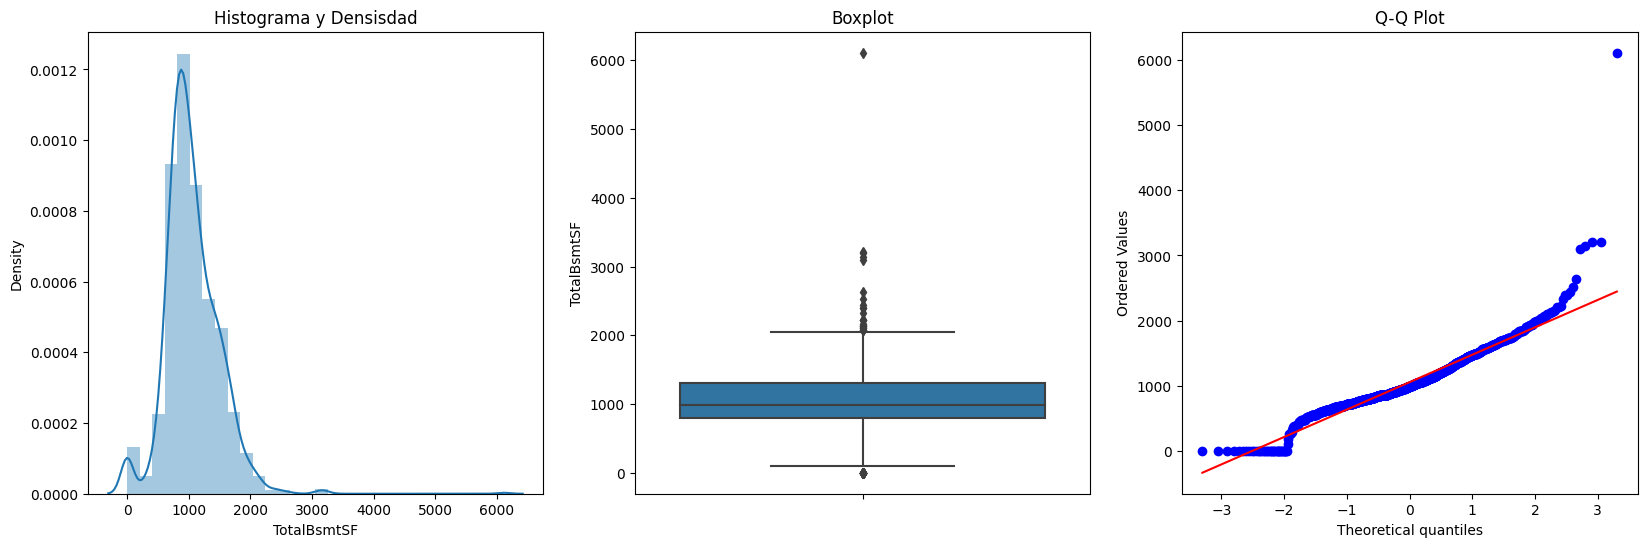

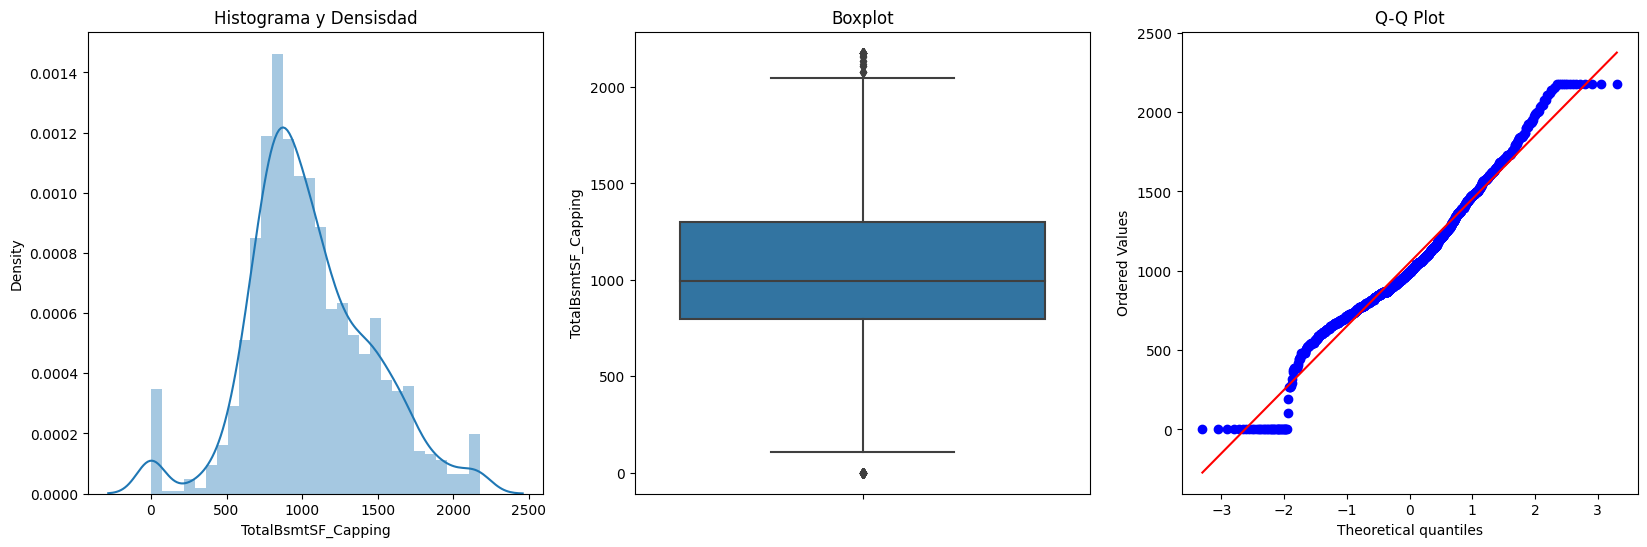

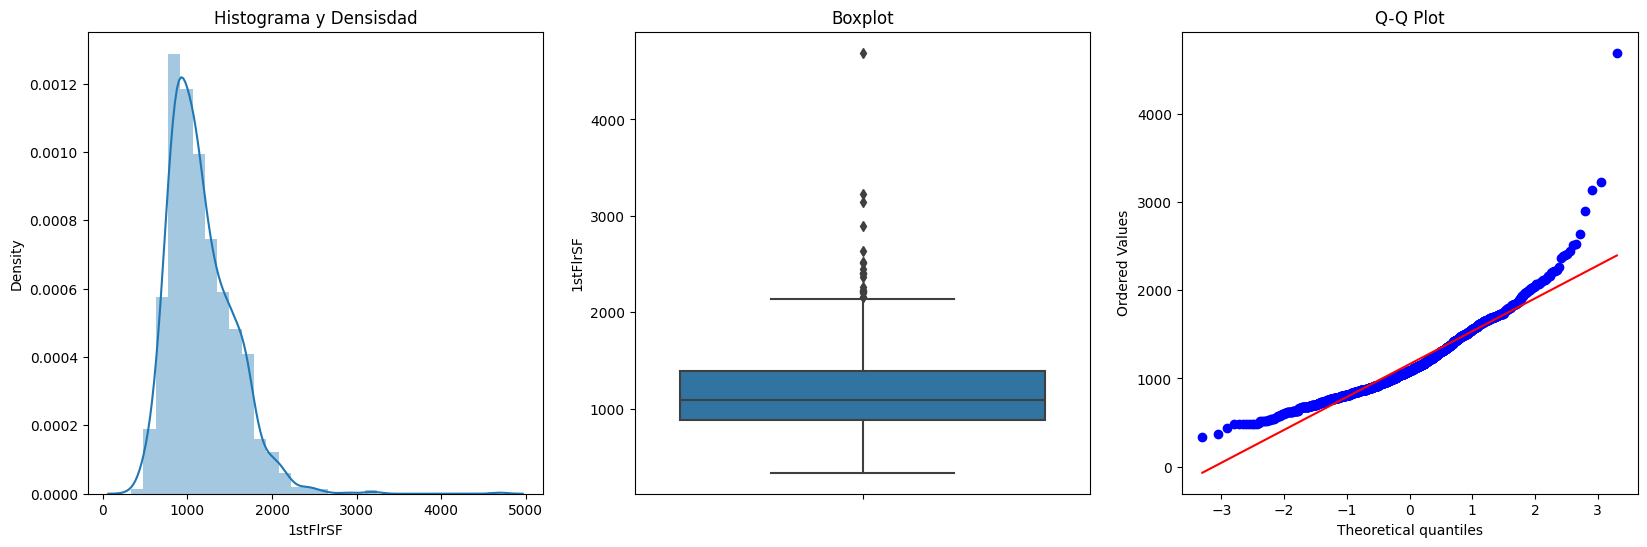

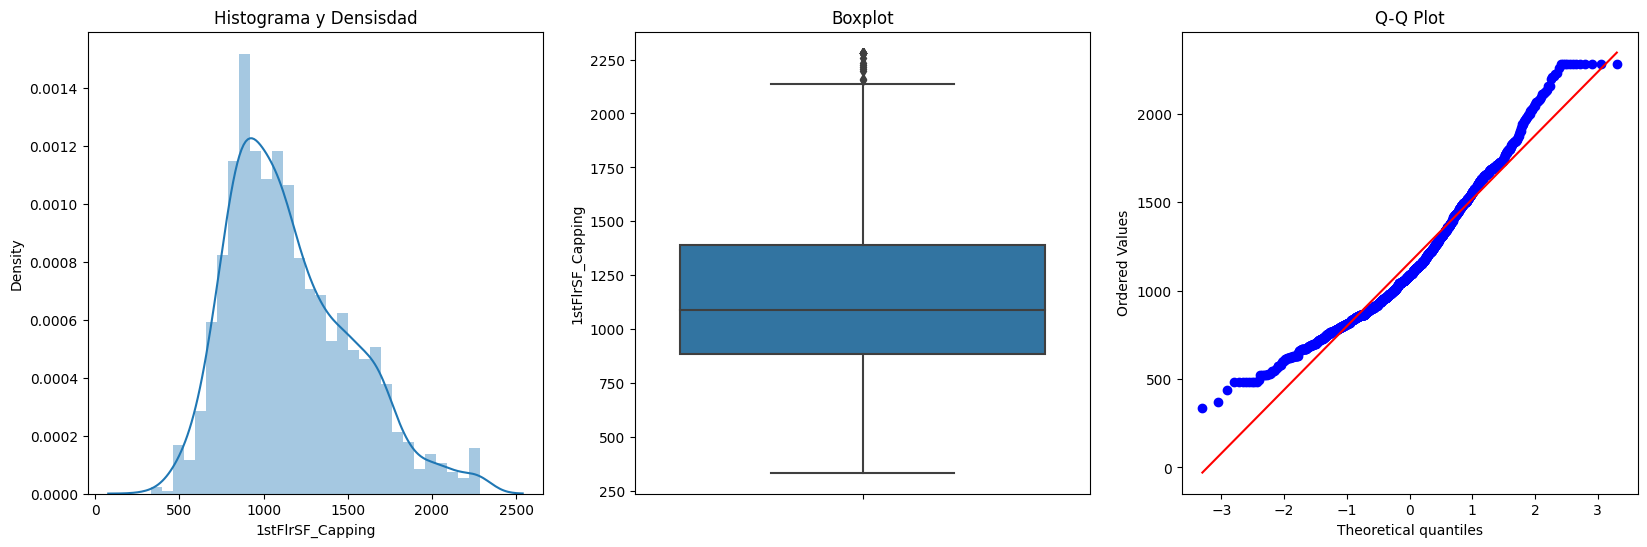

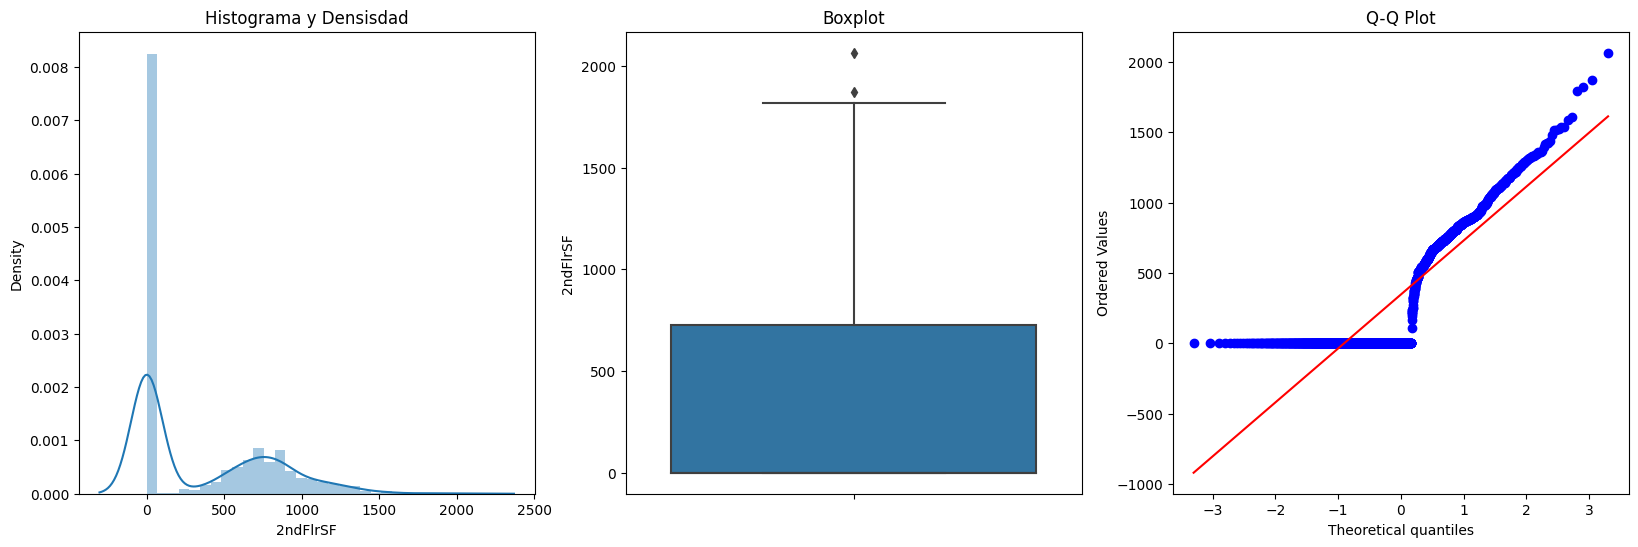

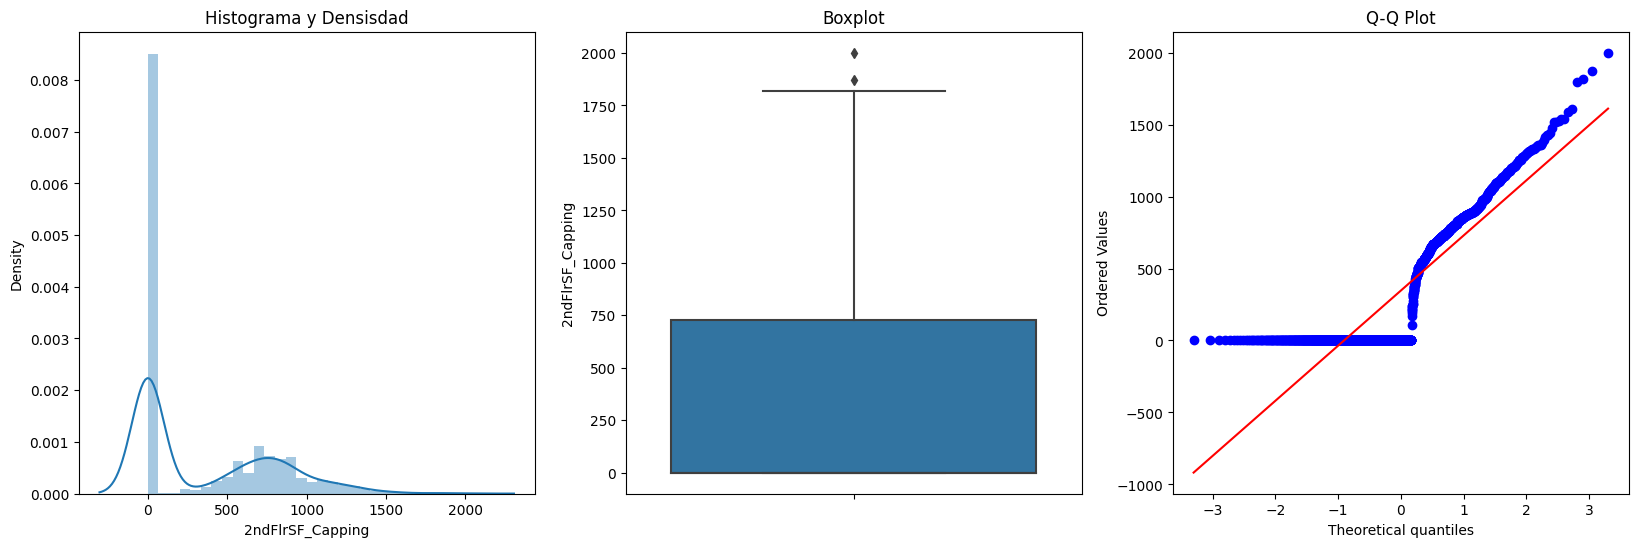

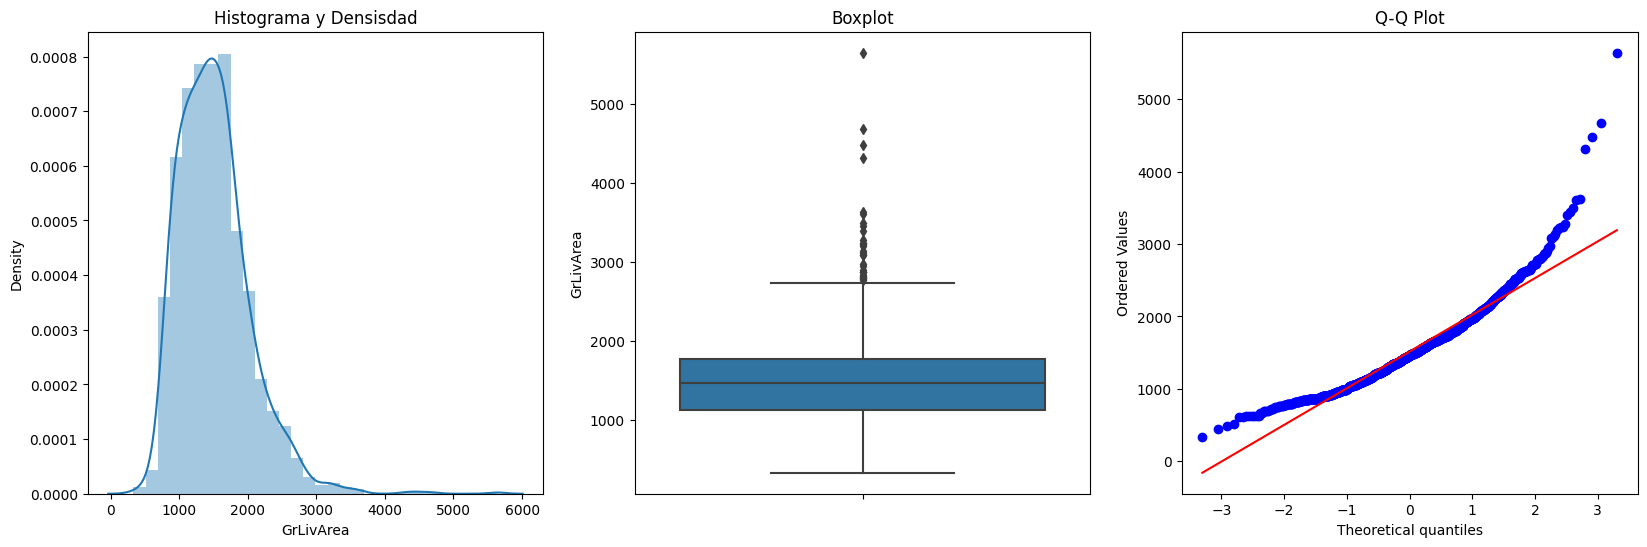

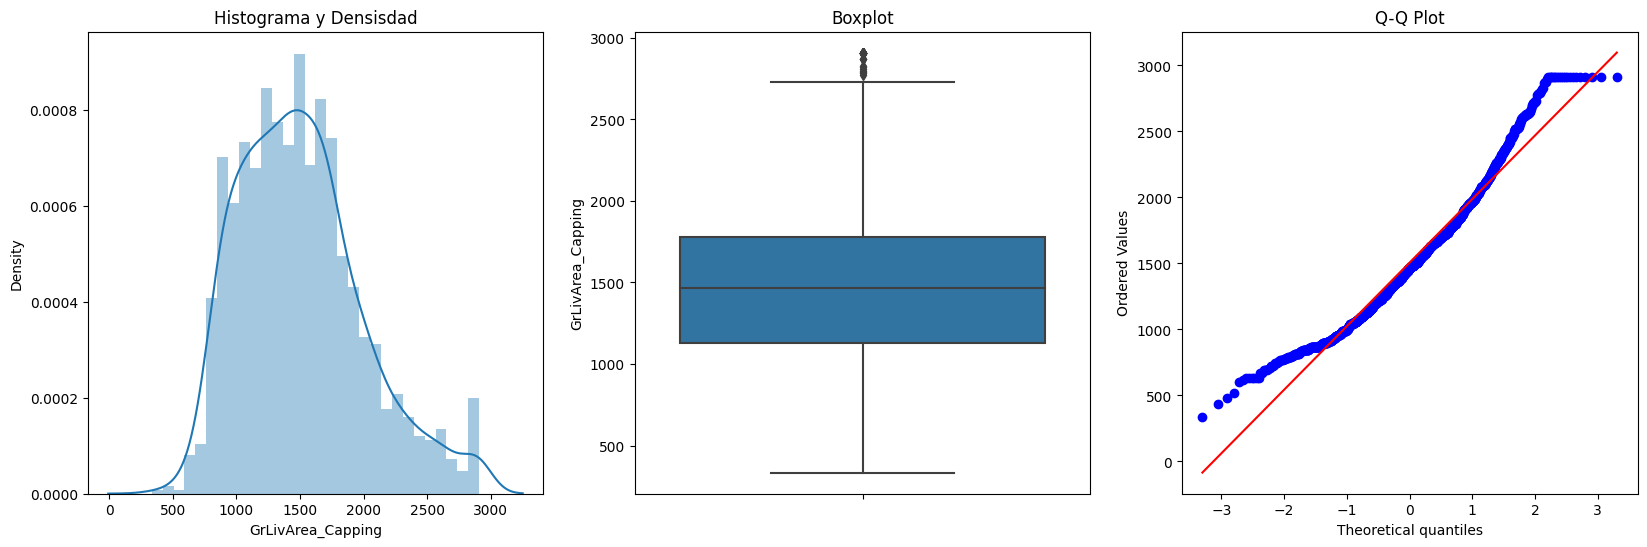

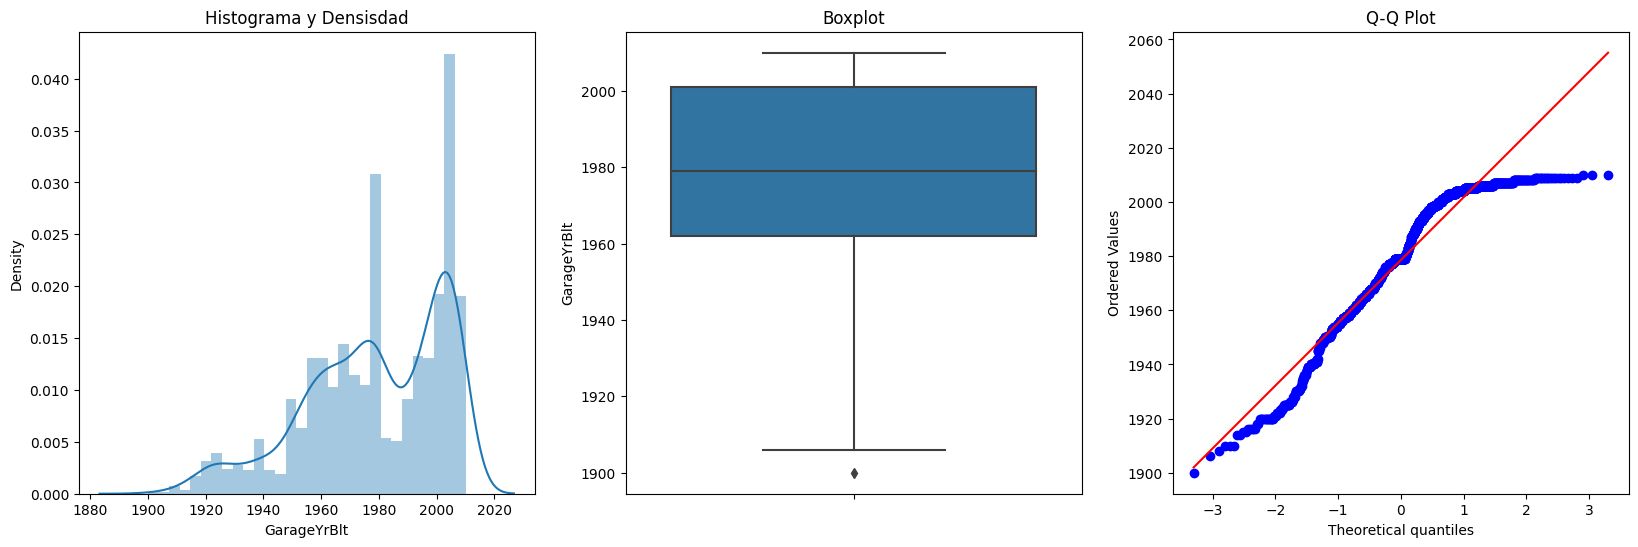

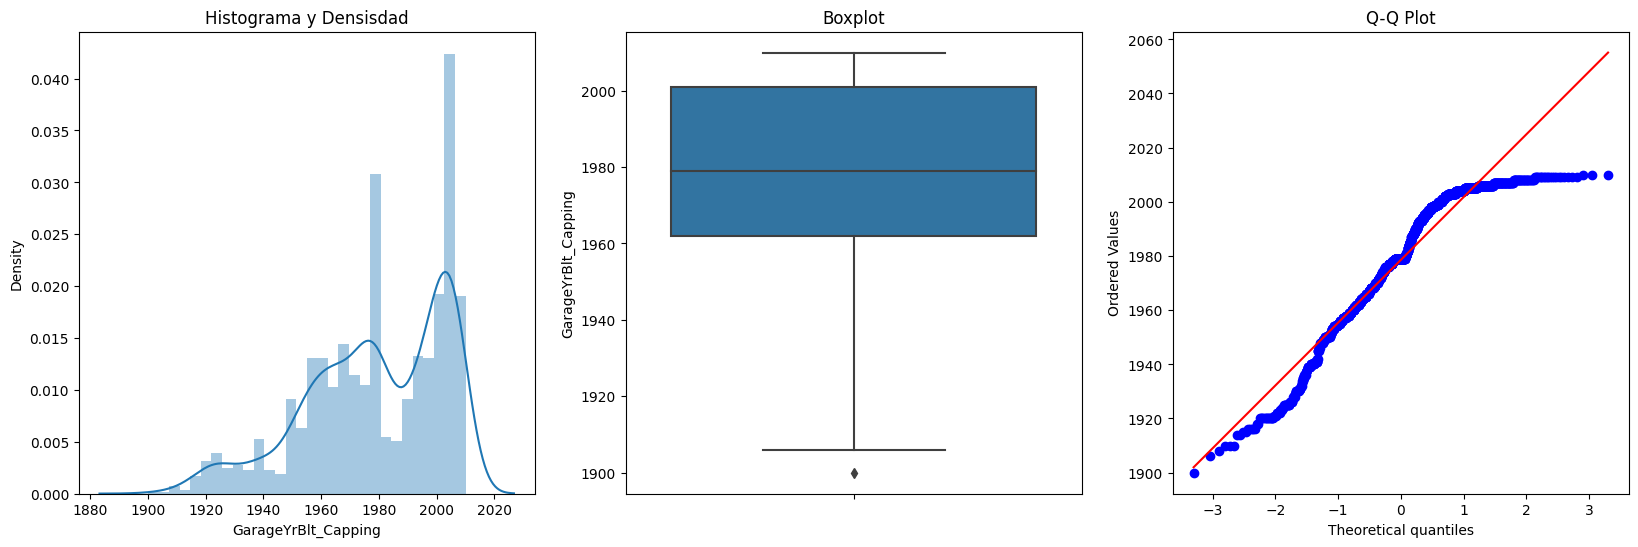

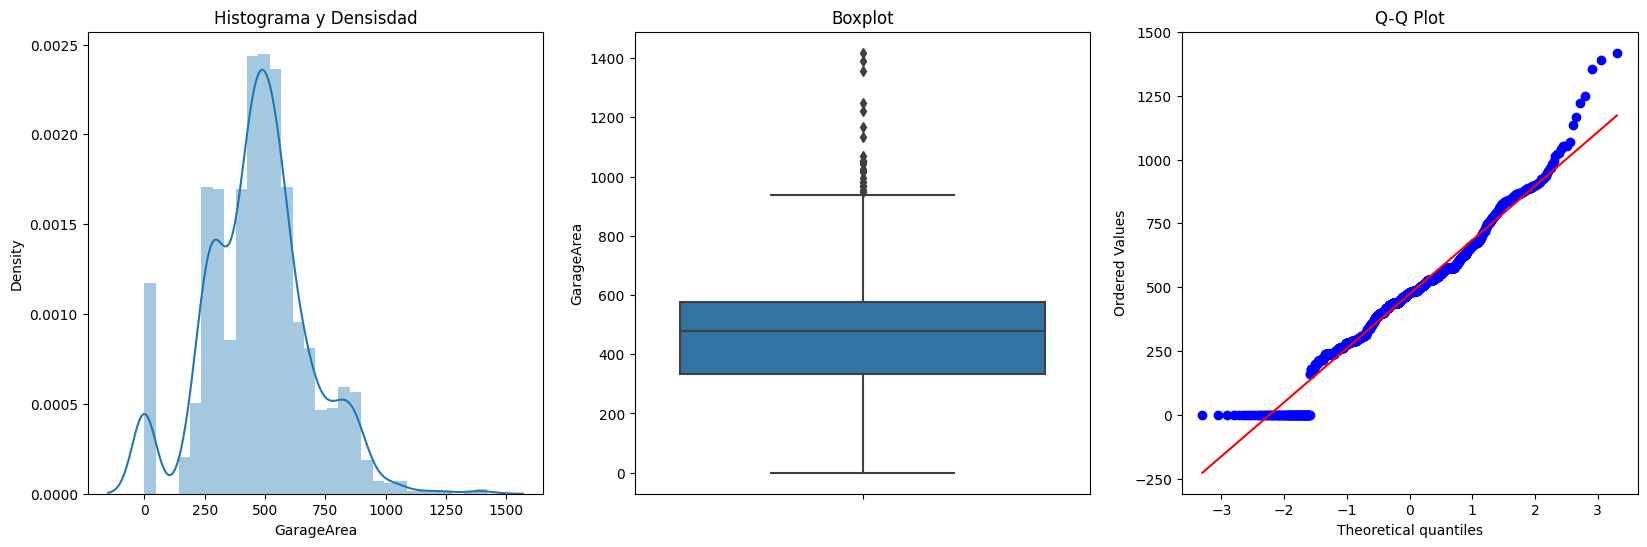

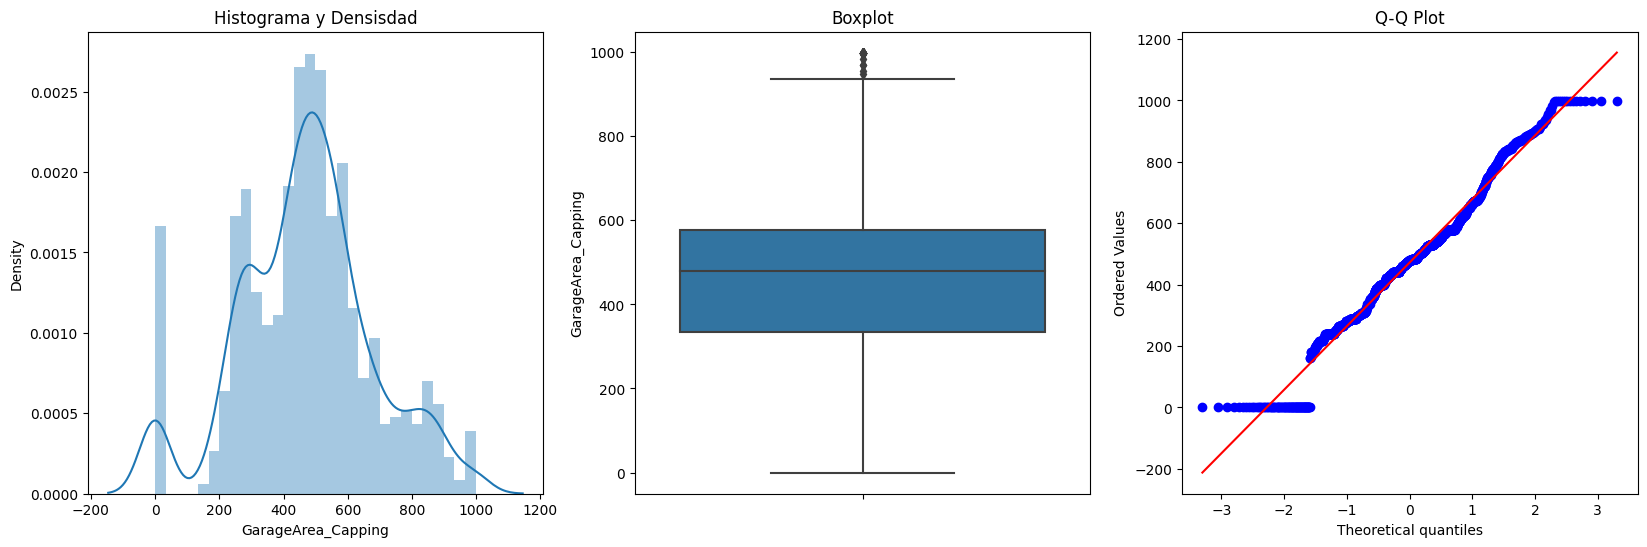

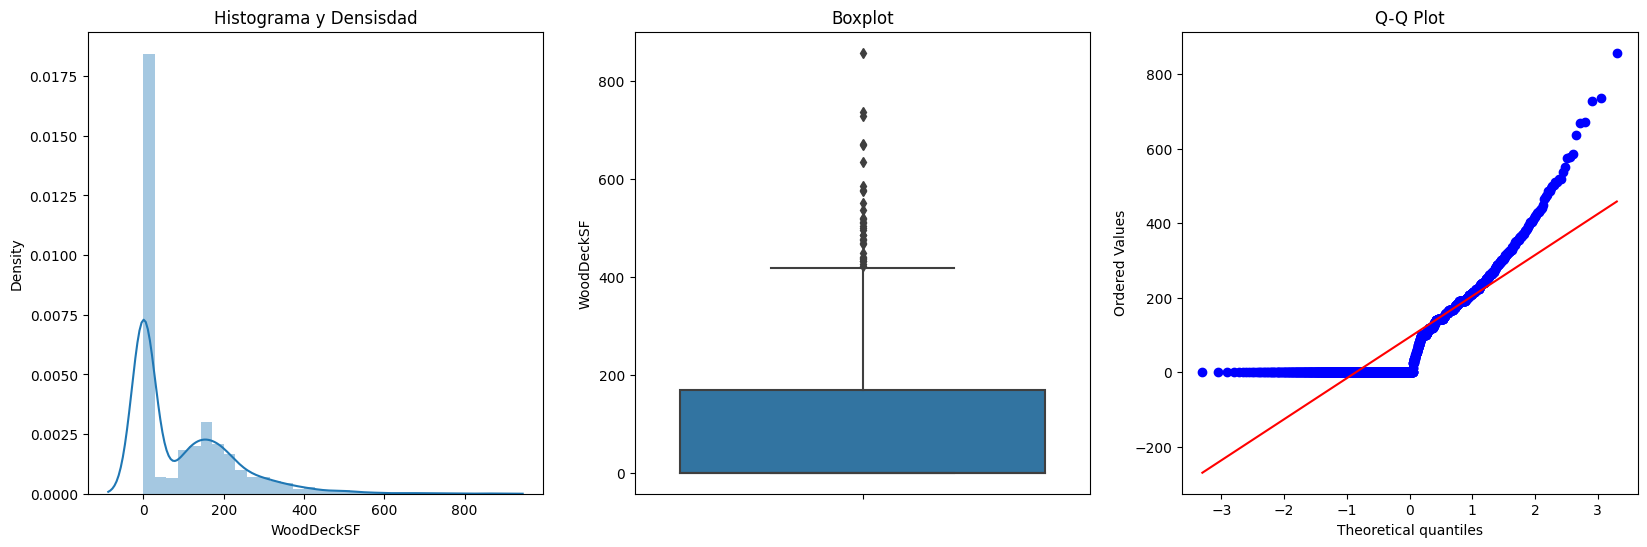

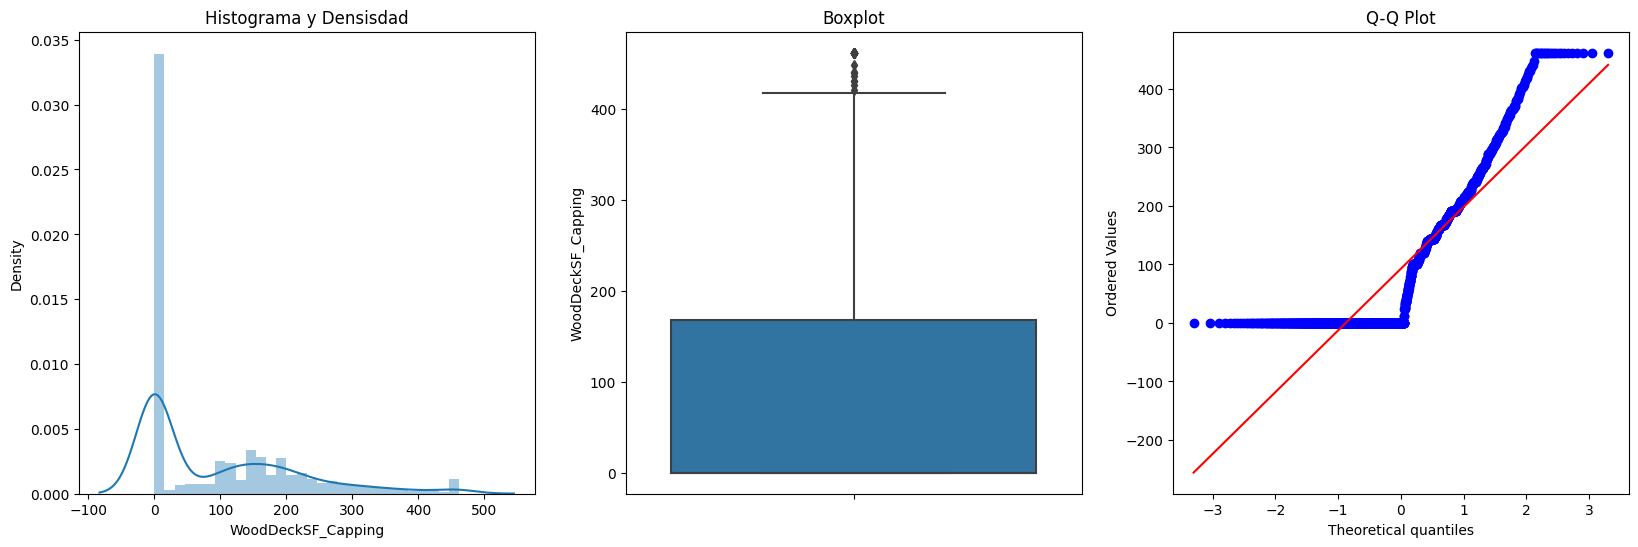

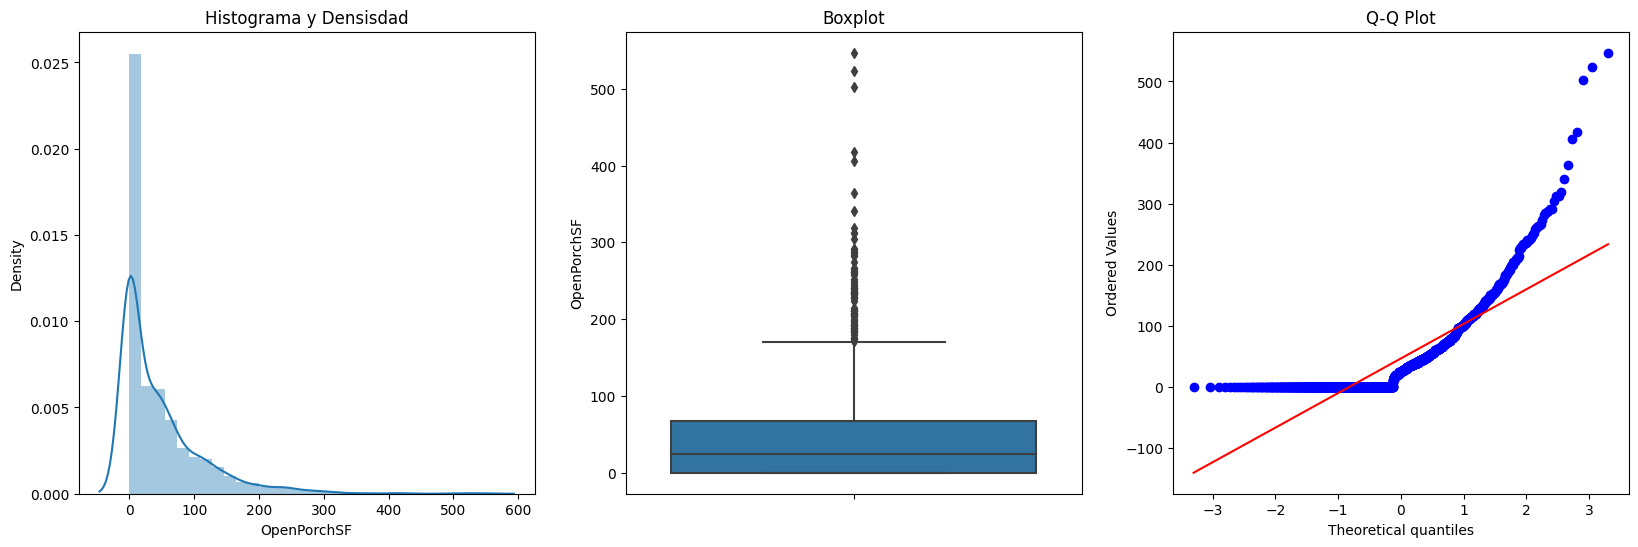

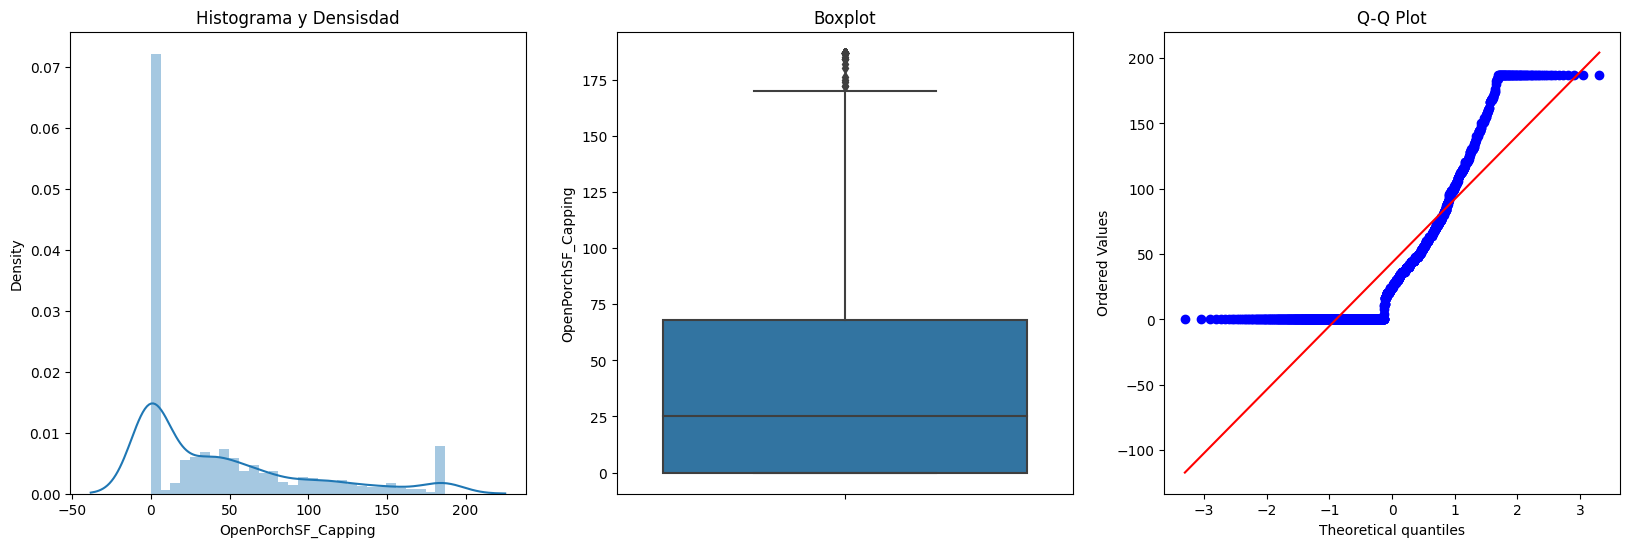

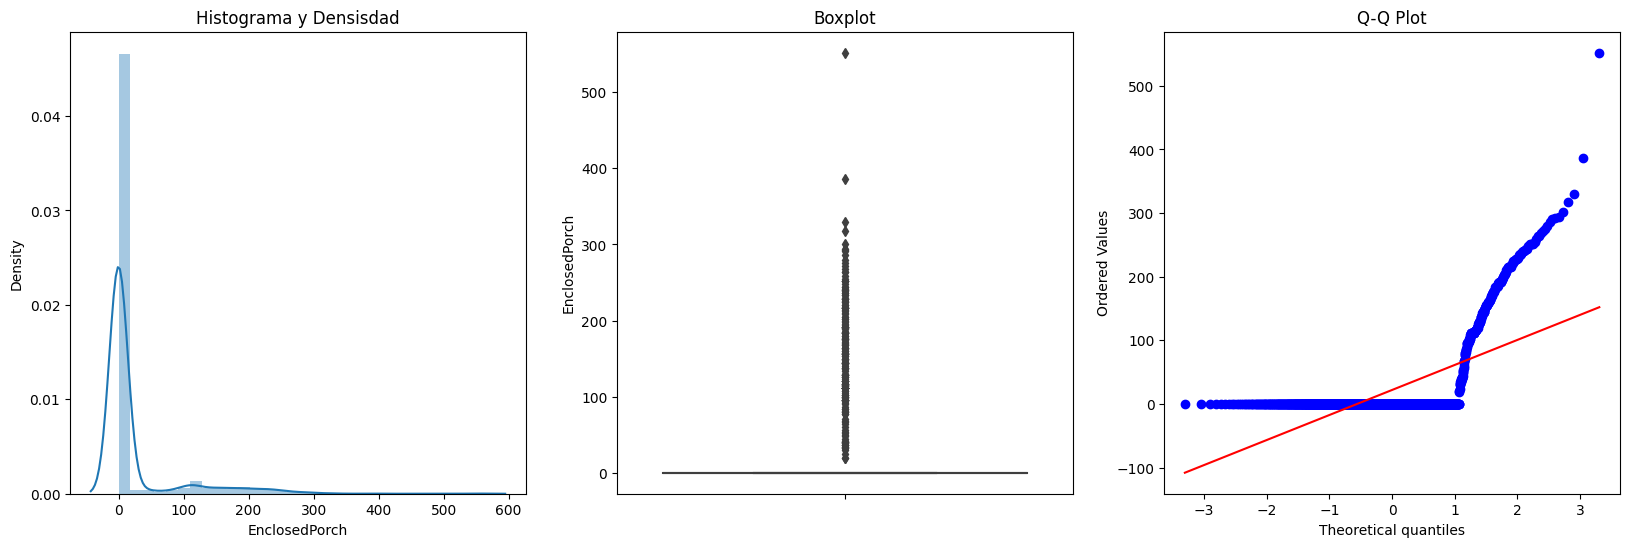

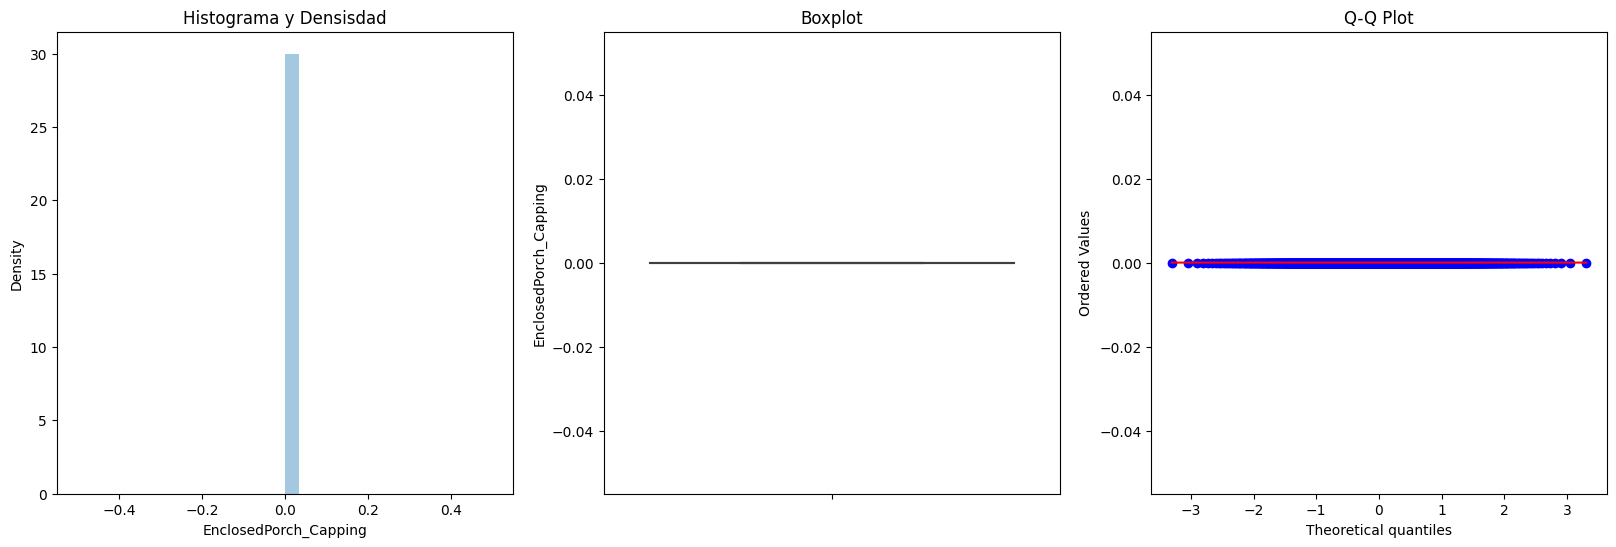

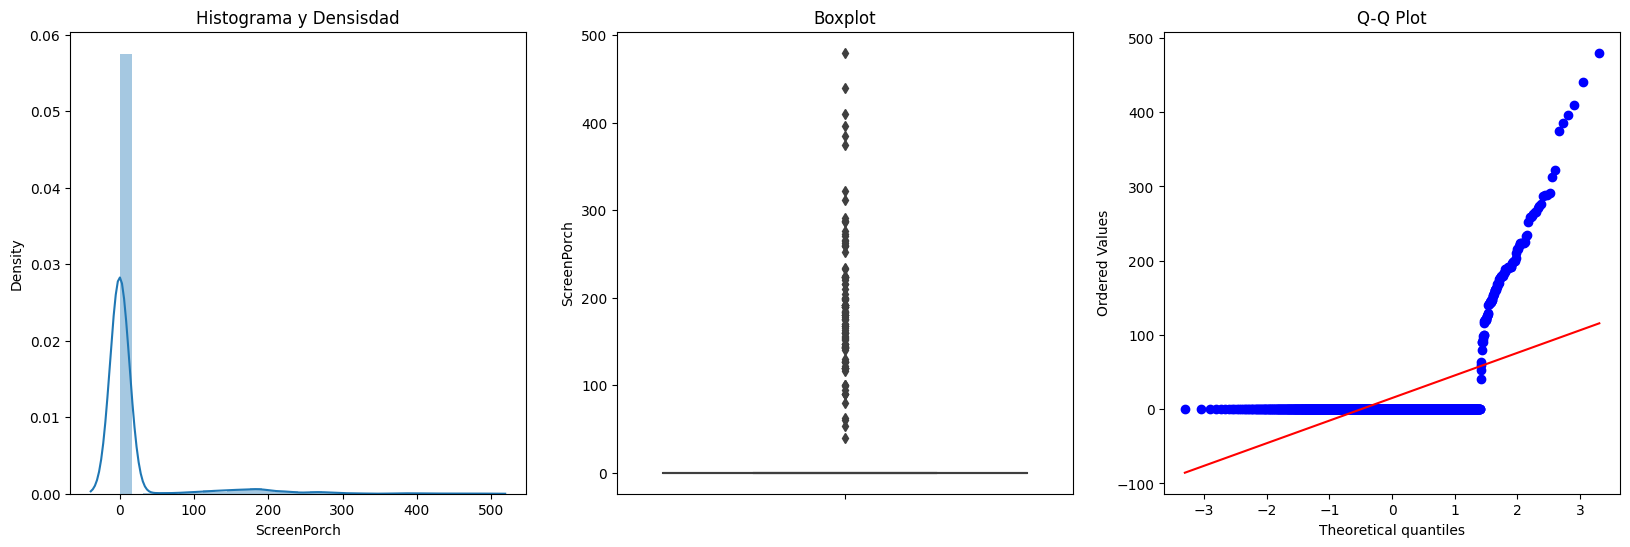

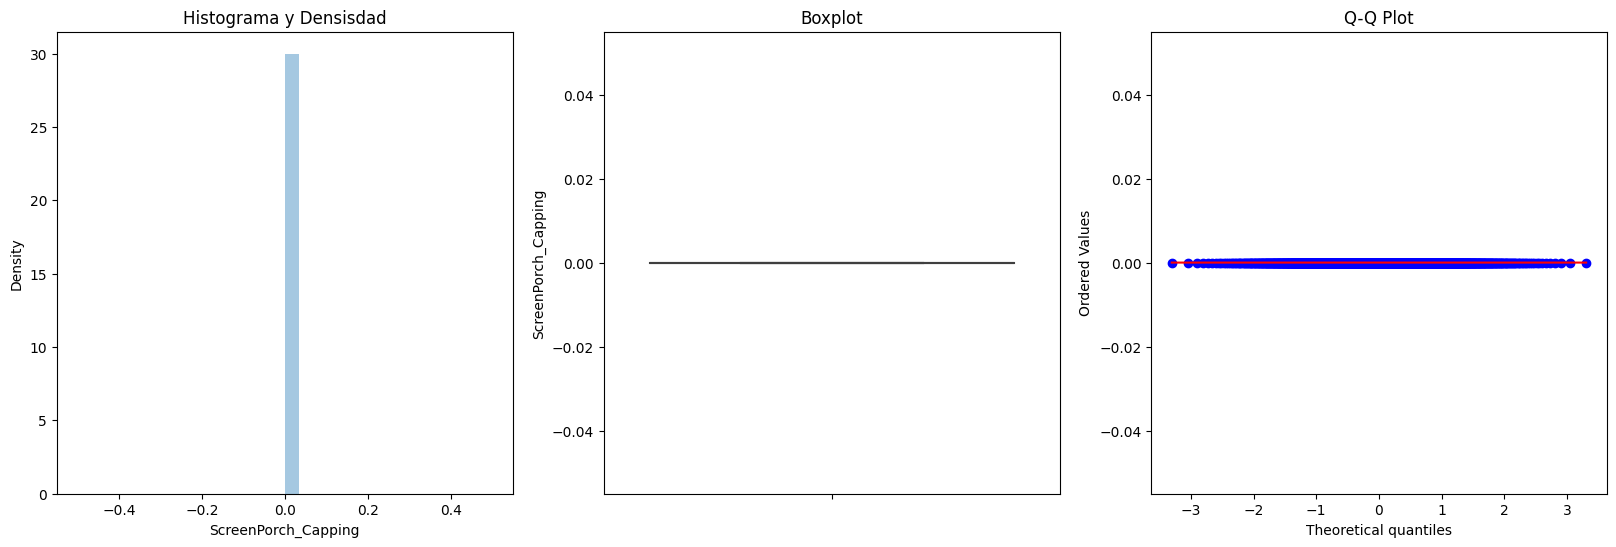

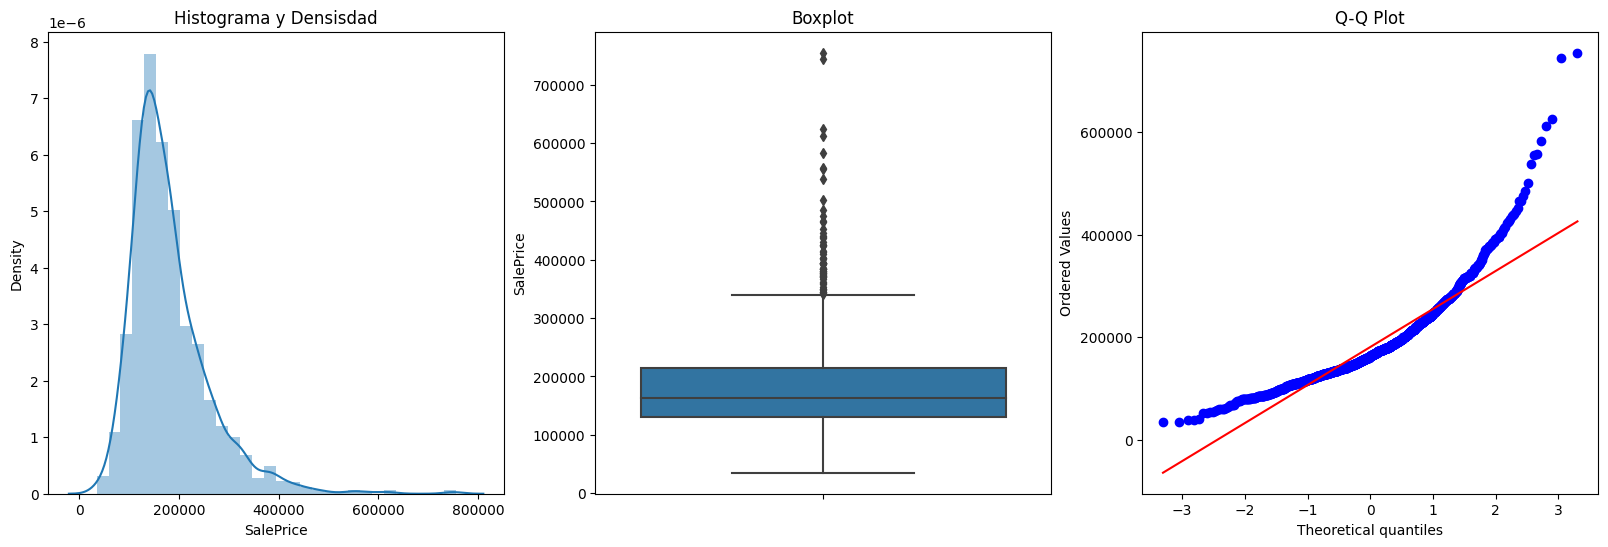

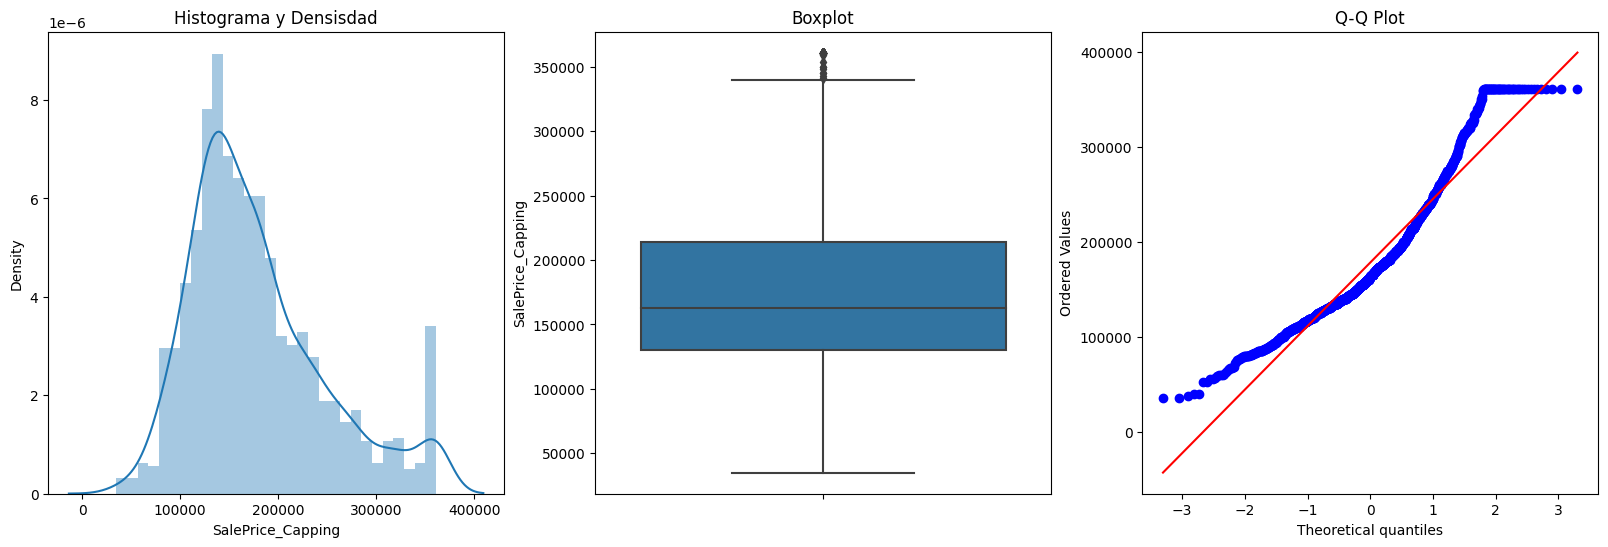

In [123]:
for col in continuas:
    plotDistBoxQQ(dataHP, col)
    plotDistBoxQQ(dataHP, col + '_Capping')